In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, set_link_color_palette
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture as GM
import dc_stat_think as dcst
import dabest
sep = '/'
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='#f2efef'

In [2]:
font = {'fontname':'Calibri'}

In [3]:
recording = r'E:\CIT_WAY\dat_files\cat\csvs'
filename ='neuron_stats.csv'

In [5]:
df = pd.read_csv(os.sep.join([recording, filename]))
df.index.name = 'Cluster_ID'
df = df[pd.notnull(df['SW_troff'])]

In [7]:
df_cit = df[(df['recording']=='Chronic_04_2018-08-05')|(df['recording']=='Chronic_30_2018-07-28')|(df['recording']=='Chronic_40_2018-08-13')|(df['recording']=='Chronic_41_2018-08-09')]
df_cit = df_cit[(df_cit['CV ISI'] != 0)&(df_cit['Firing Rate'] != 0)]

In [9]:
scale =RobustScaler()
scaled_data = scale.fit_transform(df_cit[['CV ISI', 'Firing Rate']])

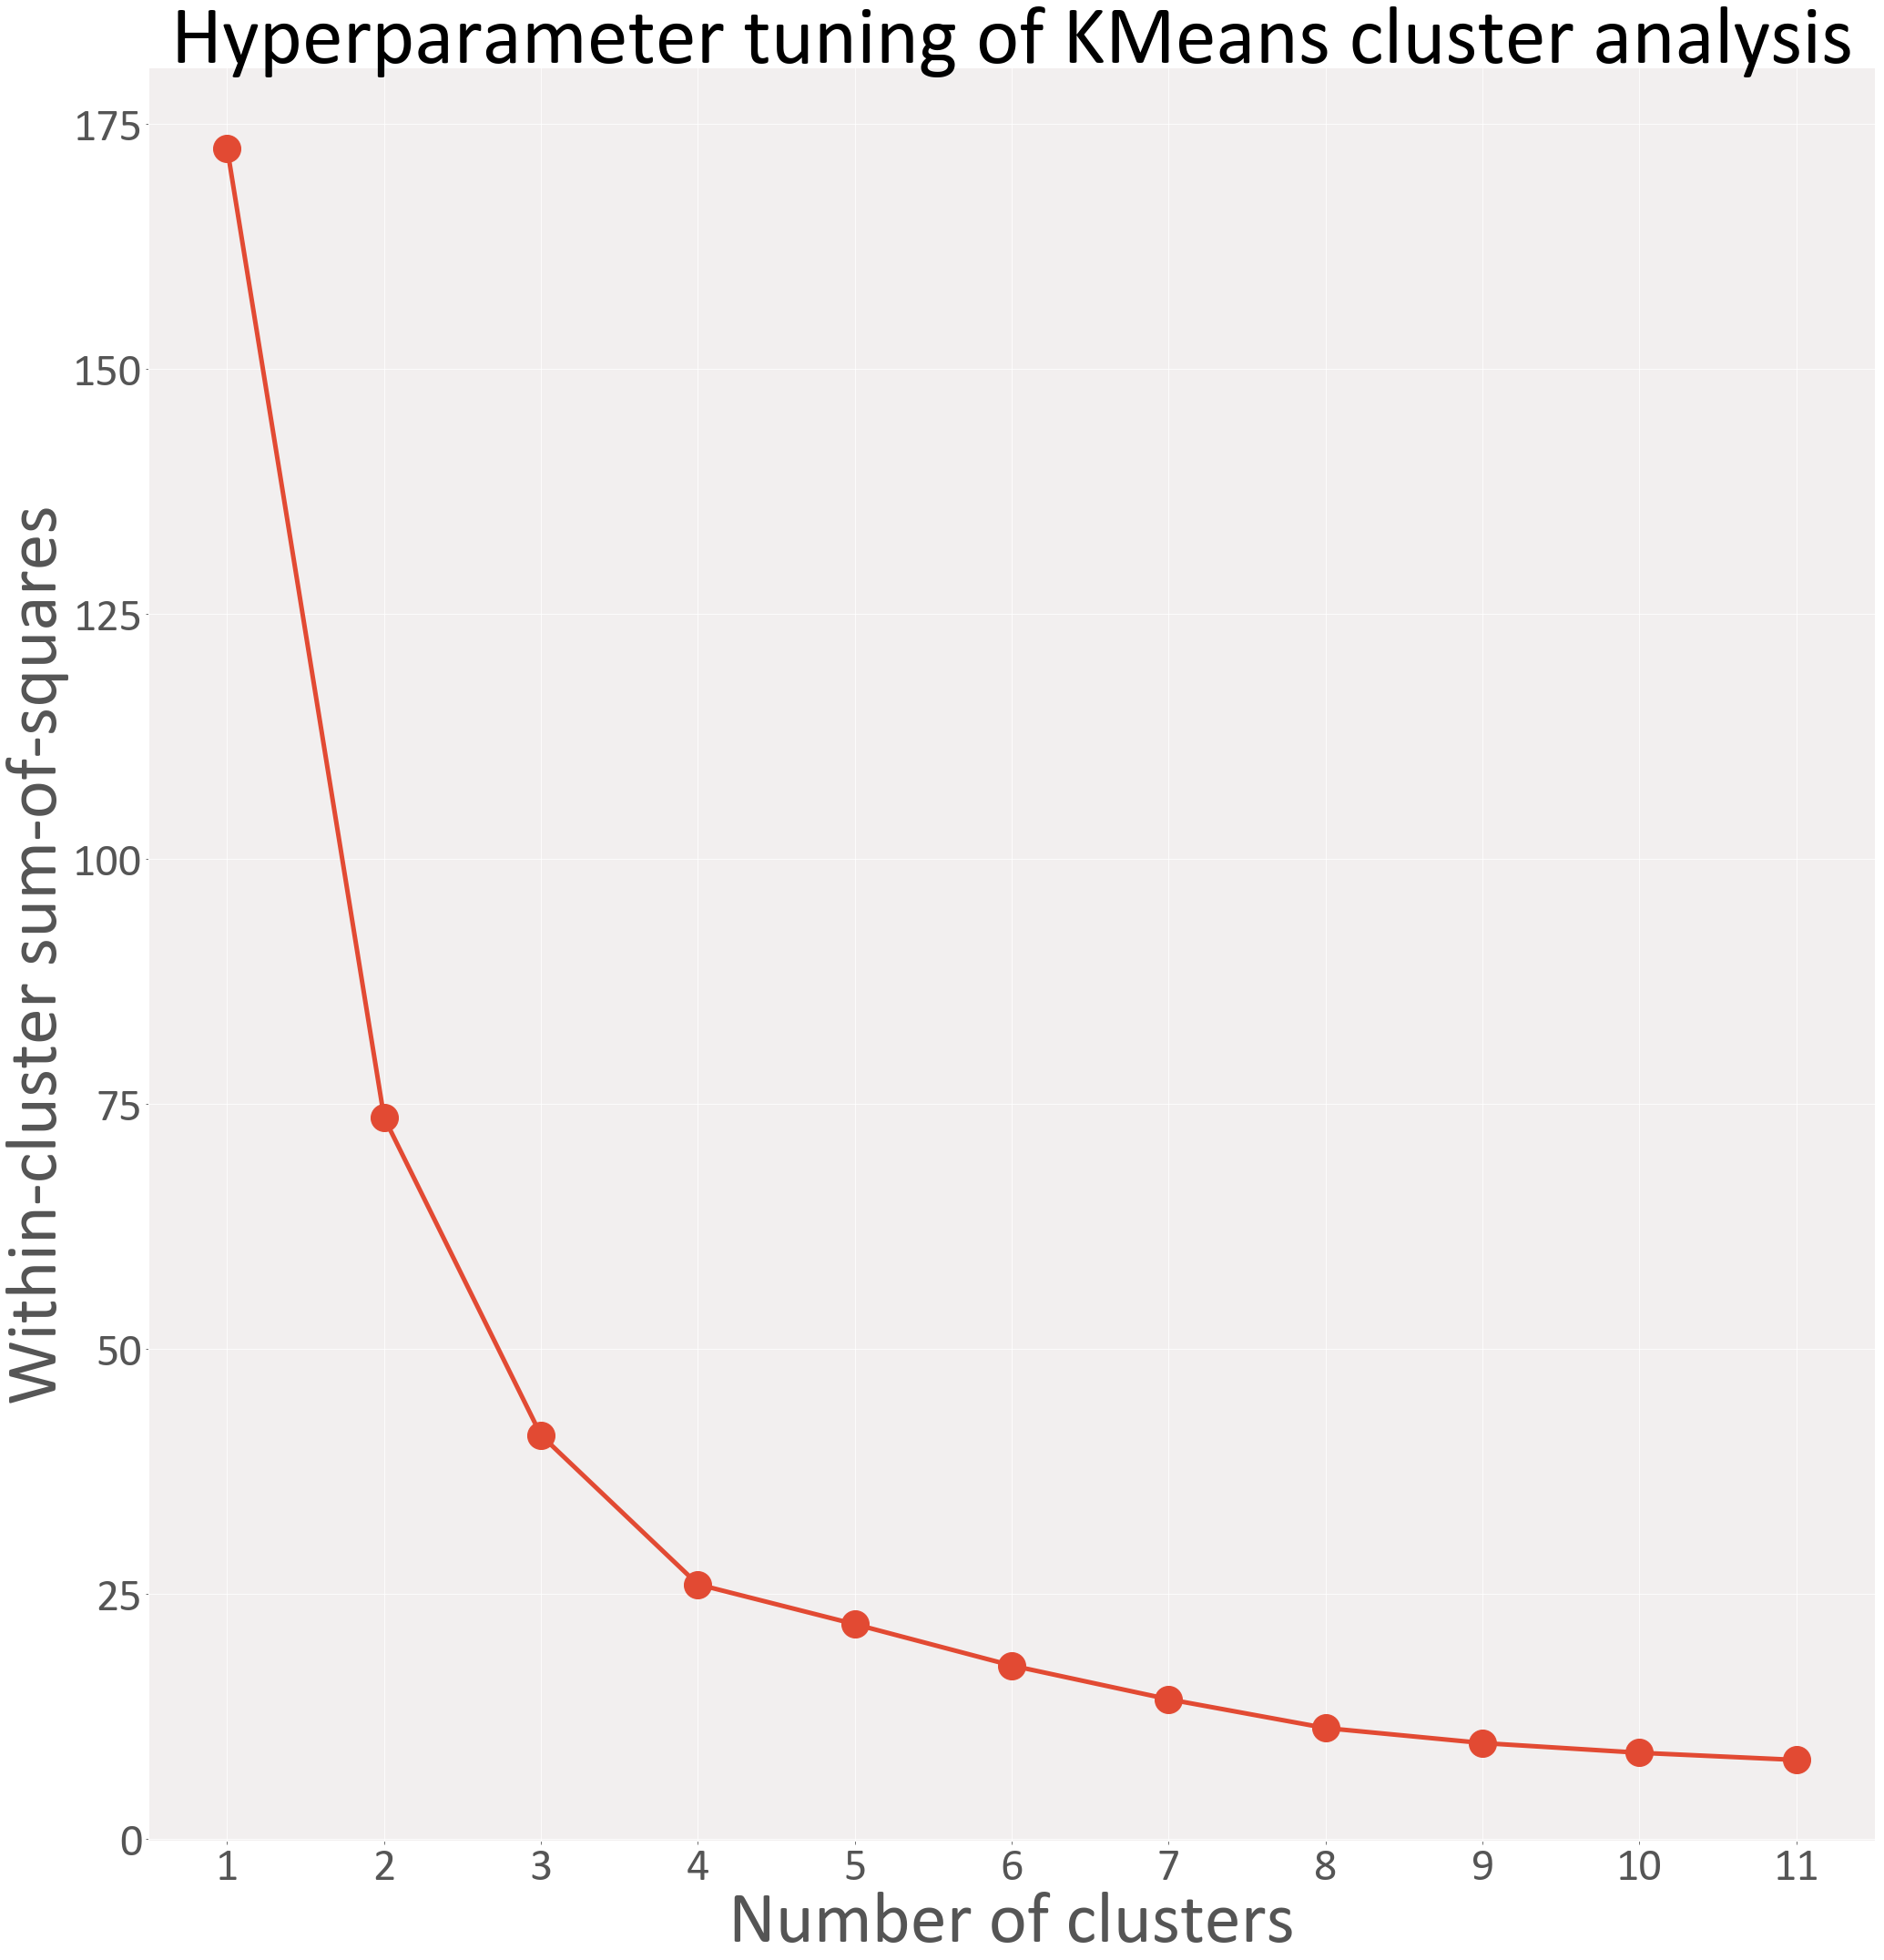

In [10]:
cluster_range = range(1, 12)
data = scaled_data
inertias = []

for clusters_no in cluster_range:
    # Create a KMeans instance with k clusters: model
    test_model = KMeans(clusters_no)
    
    # Fit model to samples
    test_model.fit(data)
    
    # Append the inertia to the list of inertias
    inertias.append(test_model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(30, 30))
plt.plot(cluster_range, inertias, '-o', linewidth=5, markersize=30)
plt.xlabel('Number of clusters', **font, fontsize=80)
plt.ylabel('Within-cluster sum-of-squares', **font, fontsize=80)
plt.title('Hyperparameter tuning of KMeans cluster analysis', **font, fontsize=90)
plt.xticks(cluster_range, **font, fontsize=50)
plt.yticks(**font, fontsize=50)
plt.tight_layout()
#plt.savefig(r'C:\Users\ASUS\Desktop\Images\Elbow\Elbow.png', dpi=600)
plt.show()

In [17]:
gmm = GM(n_components=3, covariance_type='diag').fit(scaled_data)
GMM_labels = gmm.predict(scaled_data)
df_cit['GMM_labels']=list(GMM_labels)

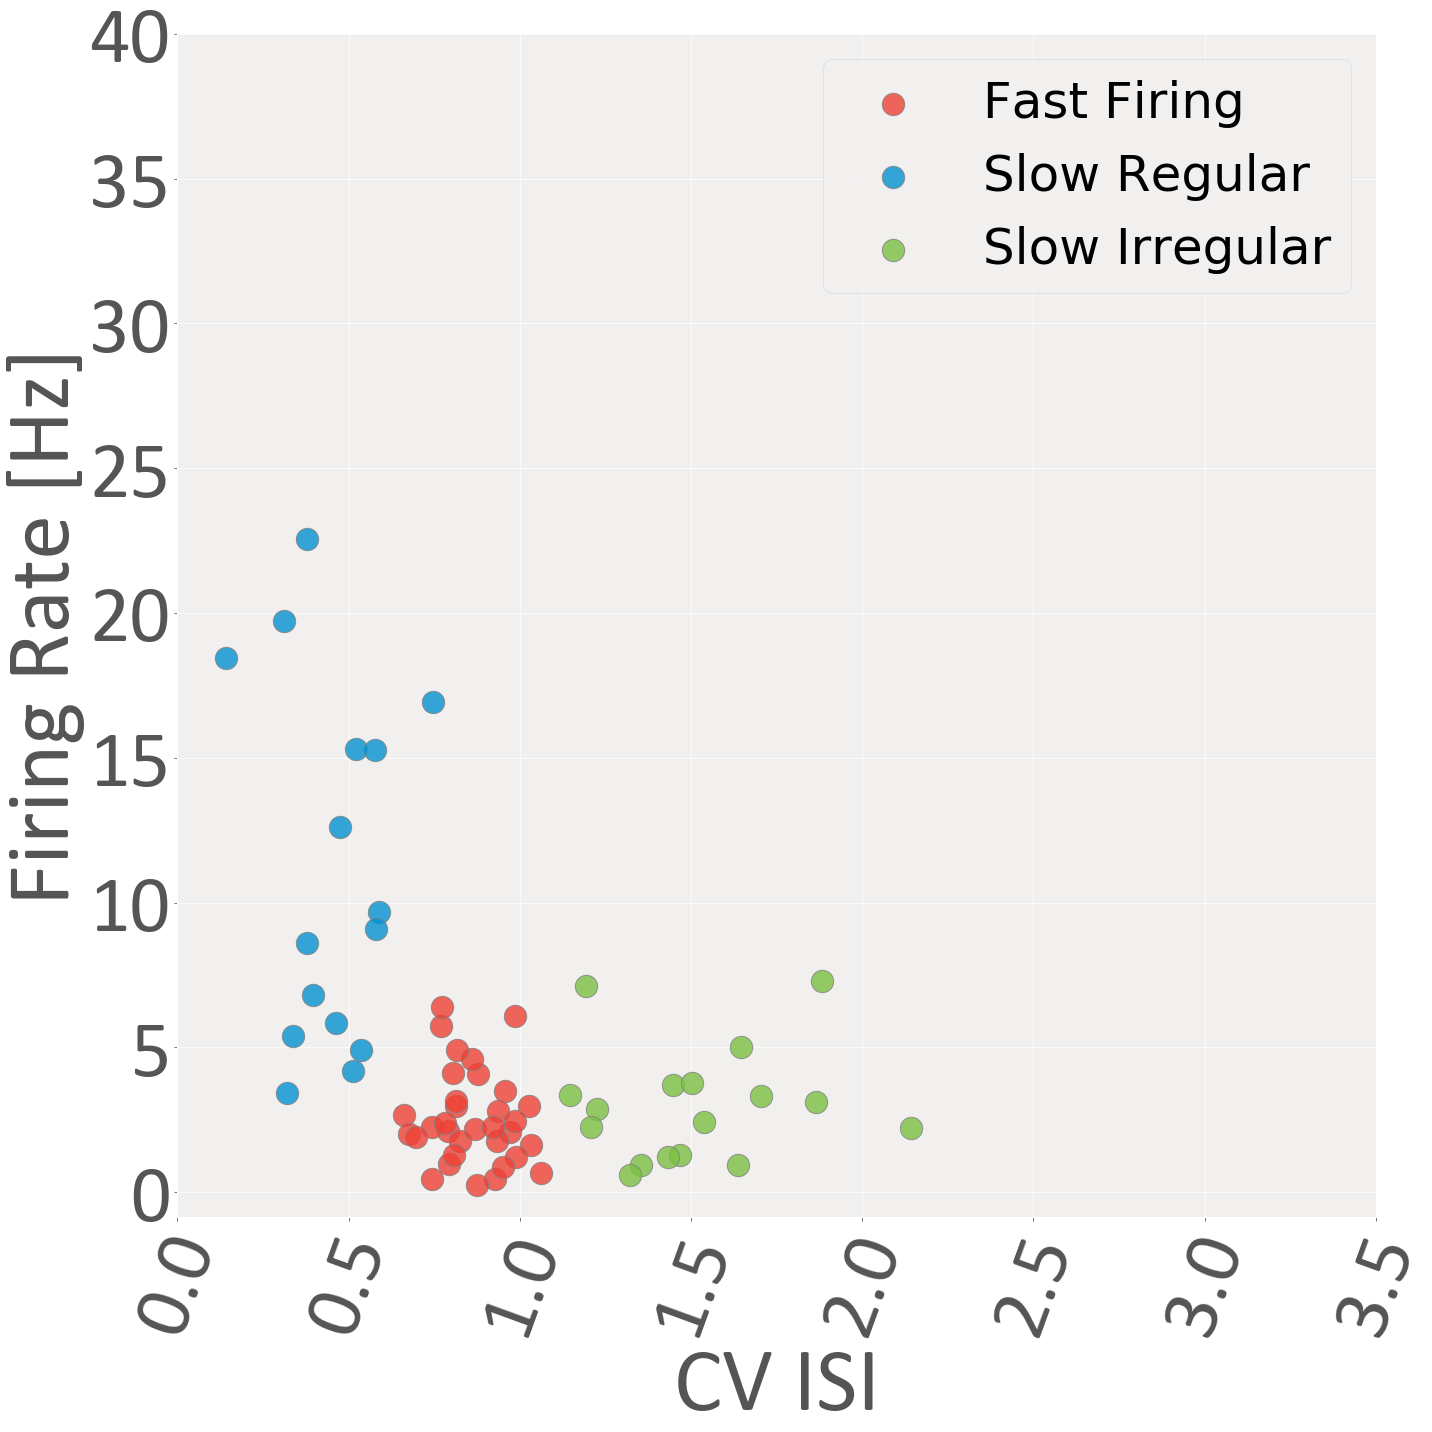

In [18]:
sns.lmplot(data=df_cit, y='Firing Rate', x='CV ISI', fit_reg=False, legend= False, hue='GMM_labels', scatter_kws={'linewidths':1,'edgecolor':'grey', 's':500, 'alpha':0.8},palette=['#ee4035', '#0392cf', '#7bc043'], size=(20))
plt.xlabel('CV ISI', **font, fontsize=90)
plt.ylabel('Firing Rate [Hz]', **font, fontsize=90)
plt.yticks(np.arange(0, 45, 5), **font, fontsize=80)
plt.xticks(np.arange(0, 4, 0.5), **font, fontsize=80, rotation=70)
plt.legend(['Fast Firing', 'Slow Regular', 'Slow Irregular'], prop={'size':50})
plt.tight_layout()
plt.savefig(r'C:\Users\ASUS\Desktop\Images\Clustered Scatterplot\Chronic Clusters.png', dpi=600)
plt.show()

In [19]:
df_cit

,spike_cluster,CV ISI,Firing Rate,recording,SW_peak,SW_return,SW_troff,base_min_amp,min_max_amp,spike_type,category,GMM_labels
Cluster_ID,,,,,,,,,,,,
17,0,0.662571,2.680278,Chronic_04_2018-08-05,NaN,0.433333,0.300000,211.301368,NaN,down_up,slow regular,0
18,2,0.879157,4.094444,Chronic_04_2018-08-05,NaN,0.566667,0.366667,497.685818,NaN,down_up,slow irregular,0
19,25,0.970950,2.085556,Chronic_04_2018-08-05,NaN,0.366667,0.266667,211.197133,NaN,down_up,slow irregular,0
20,32,0.790037,2.126944,Chronic_04_2018-08-05,NaN,0.366667,0.266667,233.874950,NaN,down_up,slow irregular,0
21,36,0.588745,9.689722,Chronic_04_2018-08-05,NaN,1.066667,0.400000,218.216893,NaN,down_up,slow regular,1
22,59,0.744023,2.261667,Chronic_04_2018-08-05,NaN,0.500000,0.333333,236.575030,NaN,down_up,slow regular,0
23,81,0.338609,5.405833,Chronic_04_2018-08-05,0.066667,0.400000,0.266667,213.275854,255.998909,up_down_up,slow regular,1
24,83,0.926602,0.451667,Chronic_04_2018-08-05,NaN,0.400000,0.300000,168.677368,NaN,down_up,slow irregular,0
25,88,1.353273,0.954722,Chronic_04_2018-08-05,NaN,0.600000,0.333333,282.279741,NaN,down_up,slow irregular,2


In [20]:
df_cit.drop(labels='category', axis=1, inplace=True)

In [21]:
def add_category1(df):
    if df == 1:
        return 'Fast Firing'
    elif df == 0:
        return 'Slow Regular'
    elif df == 2:
        return 'Slow Irregular'

df_cit['category']=df_cit['GMM_labels'].apply(add_category1)

In [22]:
df_summary_cit = df_cit.groupby('category')[['CV ISI', 'Firing Rate']].describe().loc[:, (slice('CV ISI', 'Firing Rate'), ['count', 'mean', 'std', 'min', 'max'])].transpose()

In [23]:
df_summary_cit

category           Fast Firing  Slow Irregular  Slow Regular
CV ISI      count    16.000000       17.000000     33.000000
            mean      0.454292        1.512799      0.862702
            std       0.144490        0.275424      0.107098
            min       0.141890        1.147208      0.662571
            max       0.747495        2.142045      1.062449
Firing Rate count    16.000000       17.000000     33.000000
            mean     11.175139        3.026944      2.580707
            std       6.147218        1.979890      1.613300
            min       3.425833        0.608611      0.264722
            max      22.557500        7.306111      6.400278

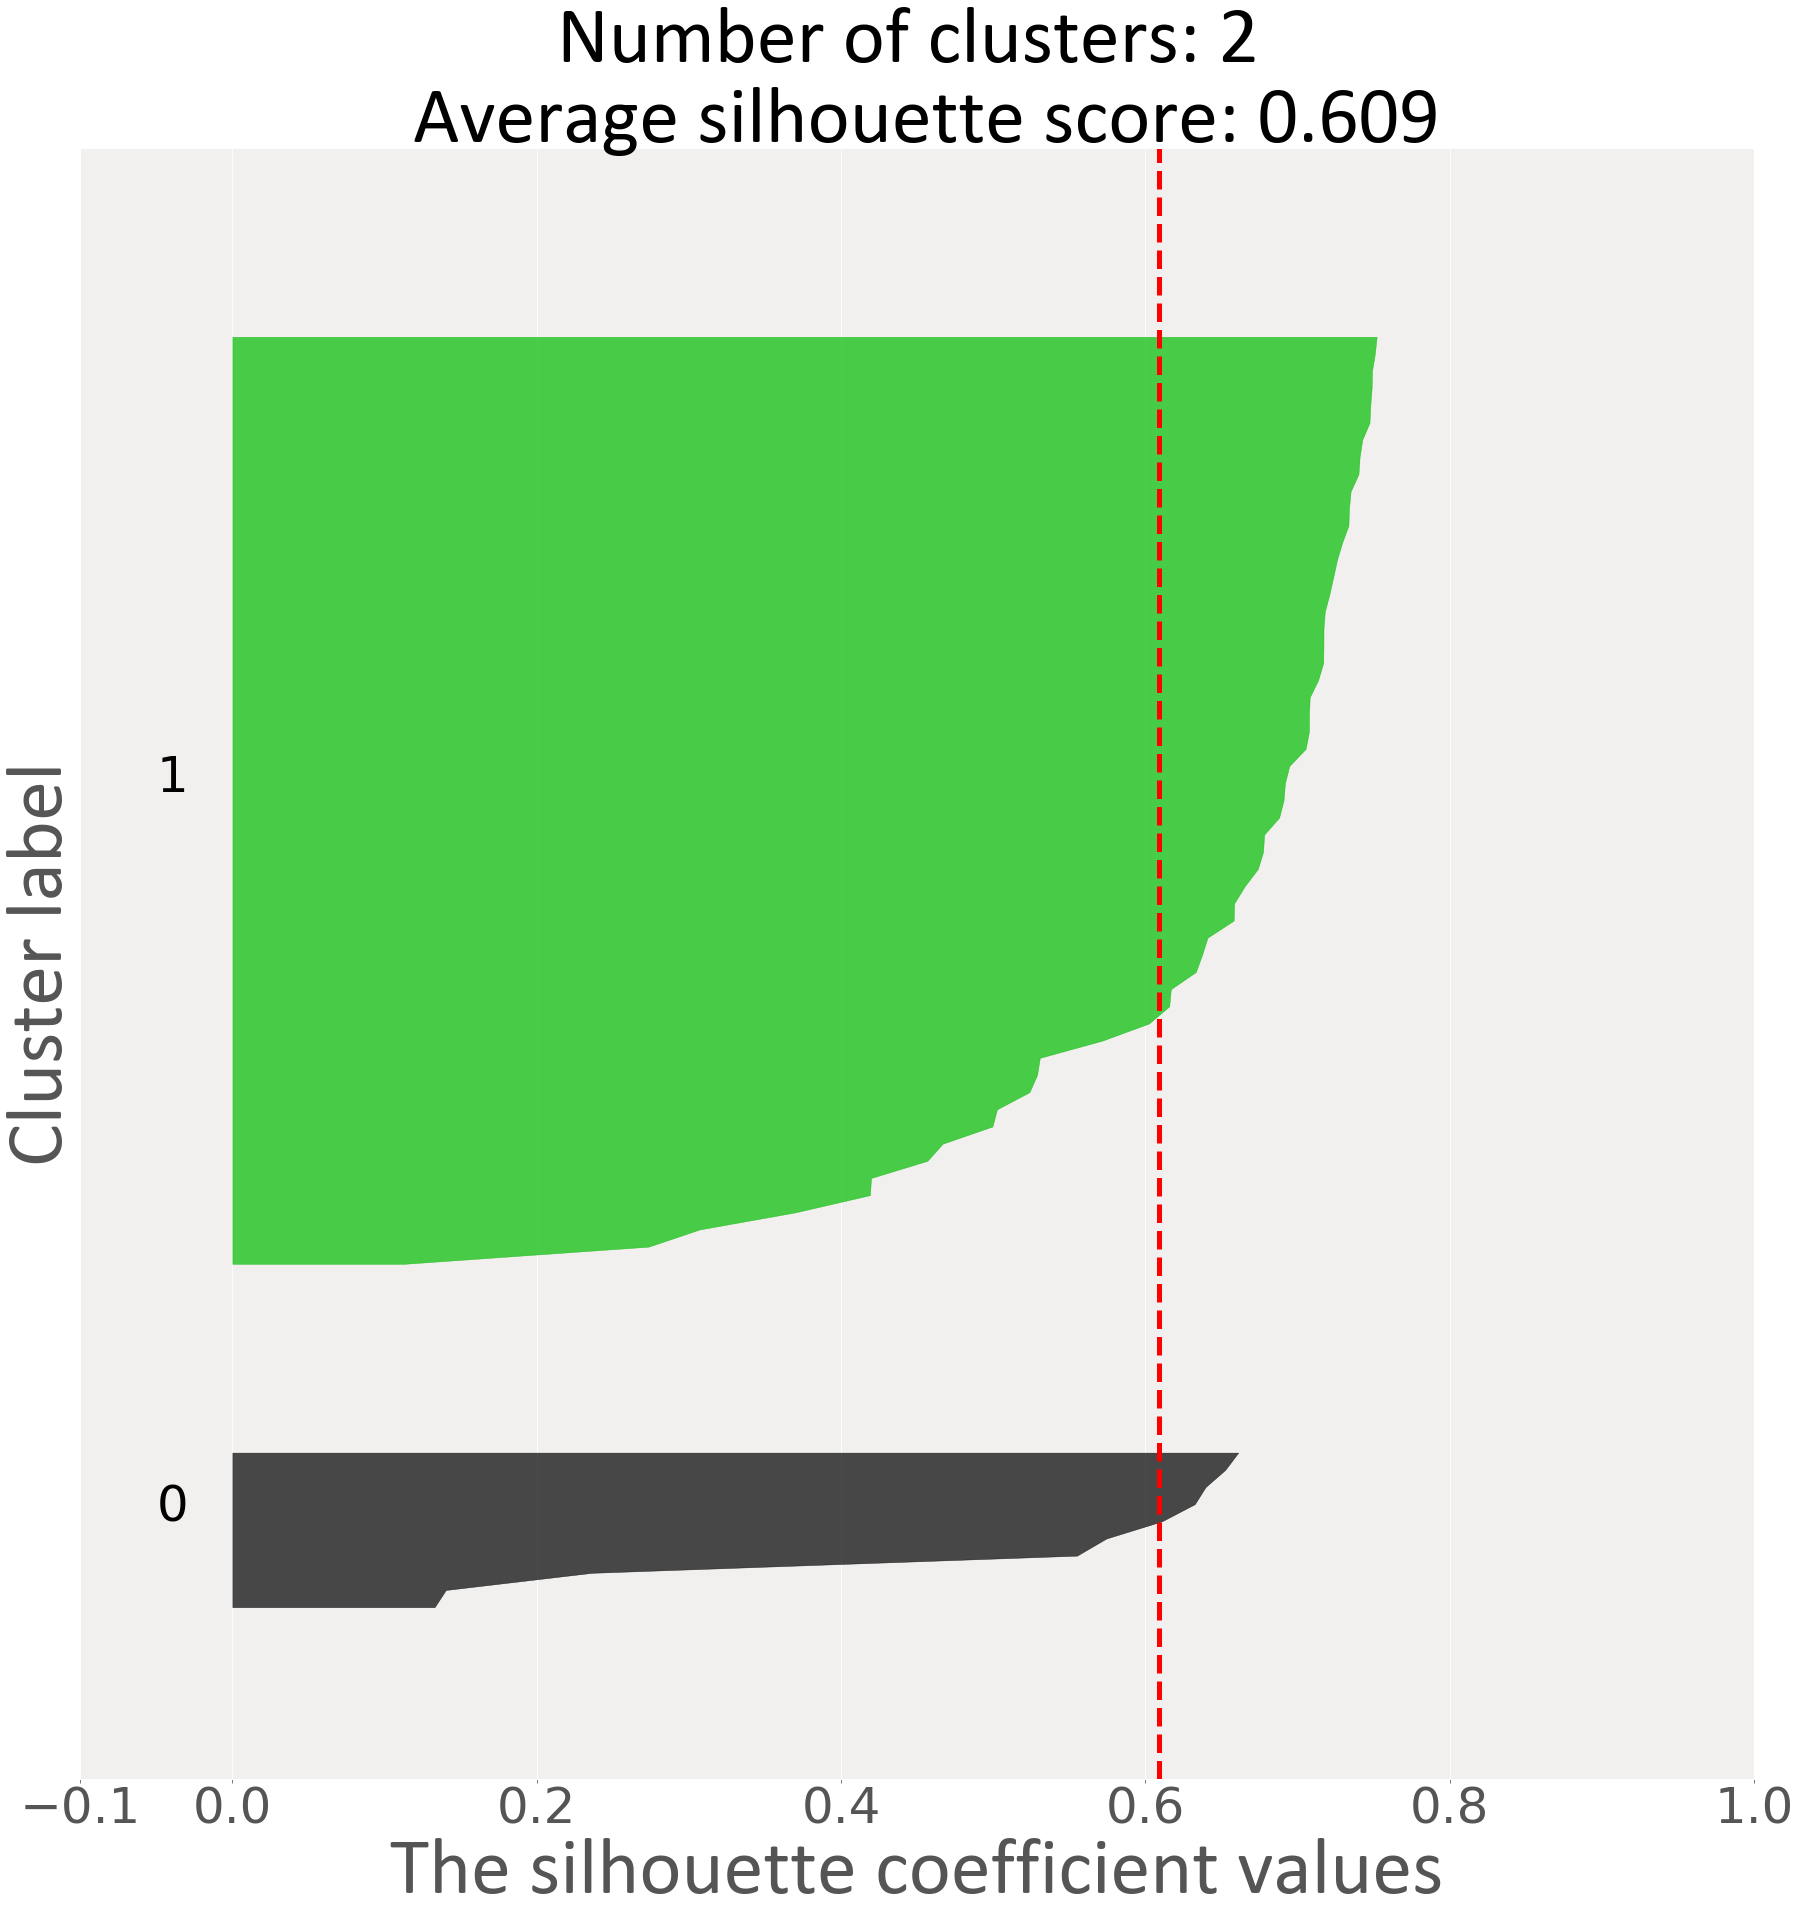

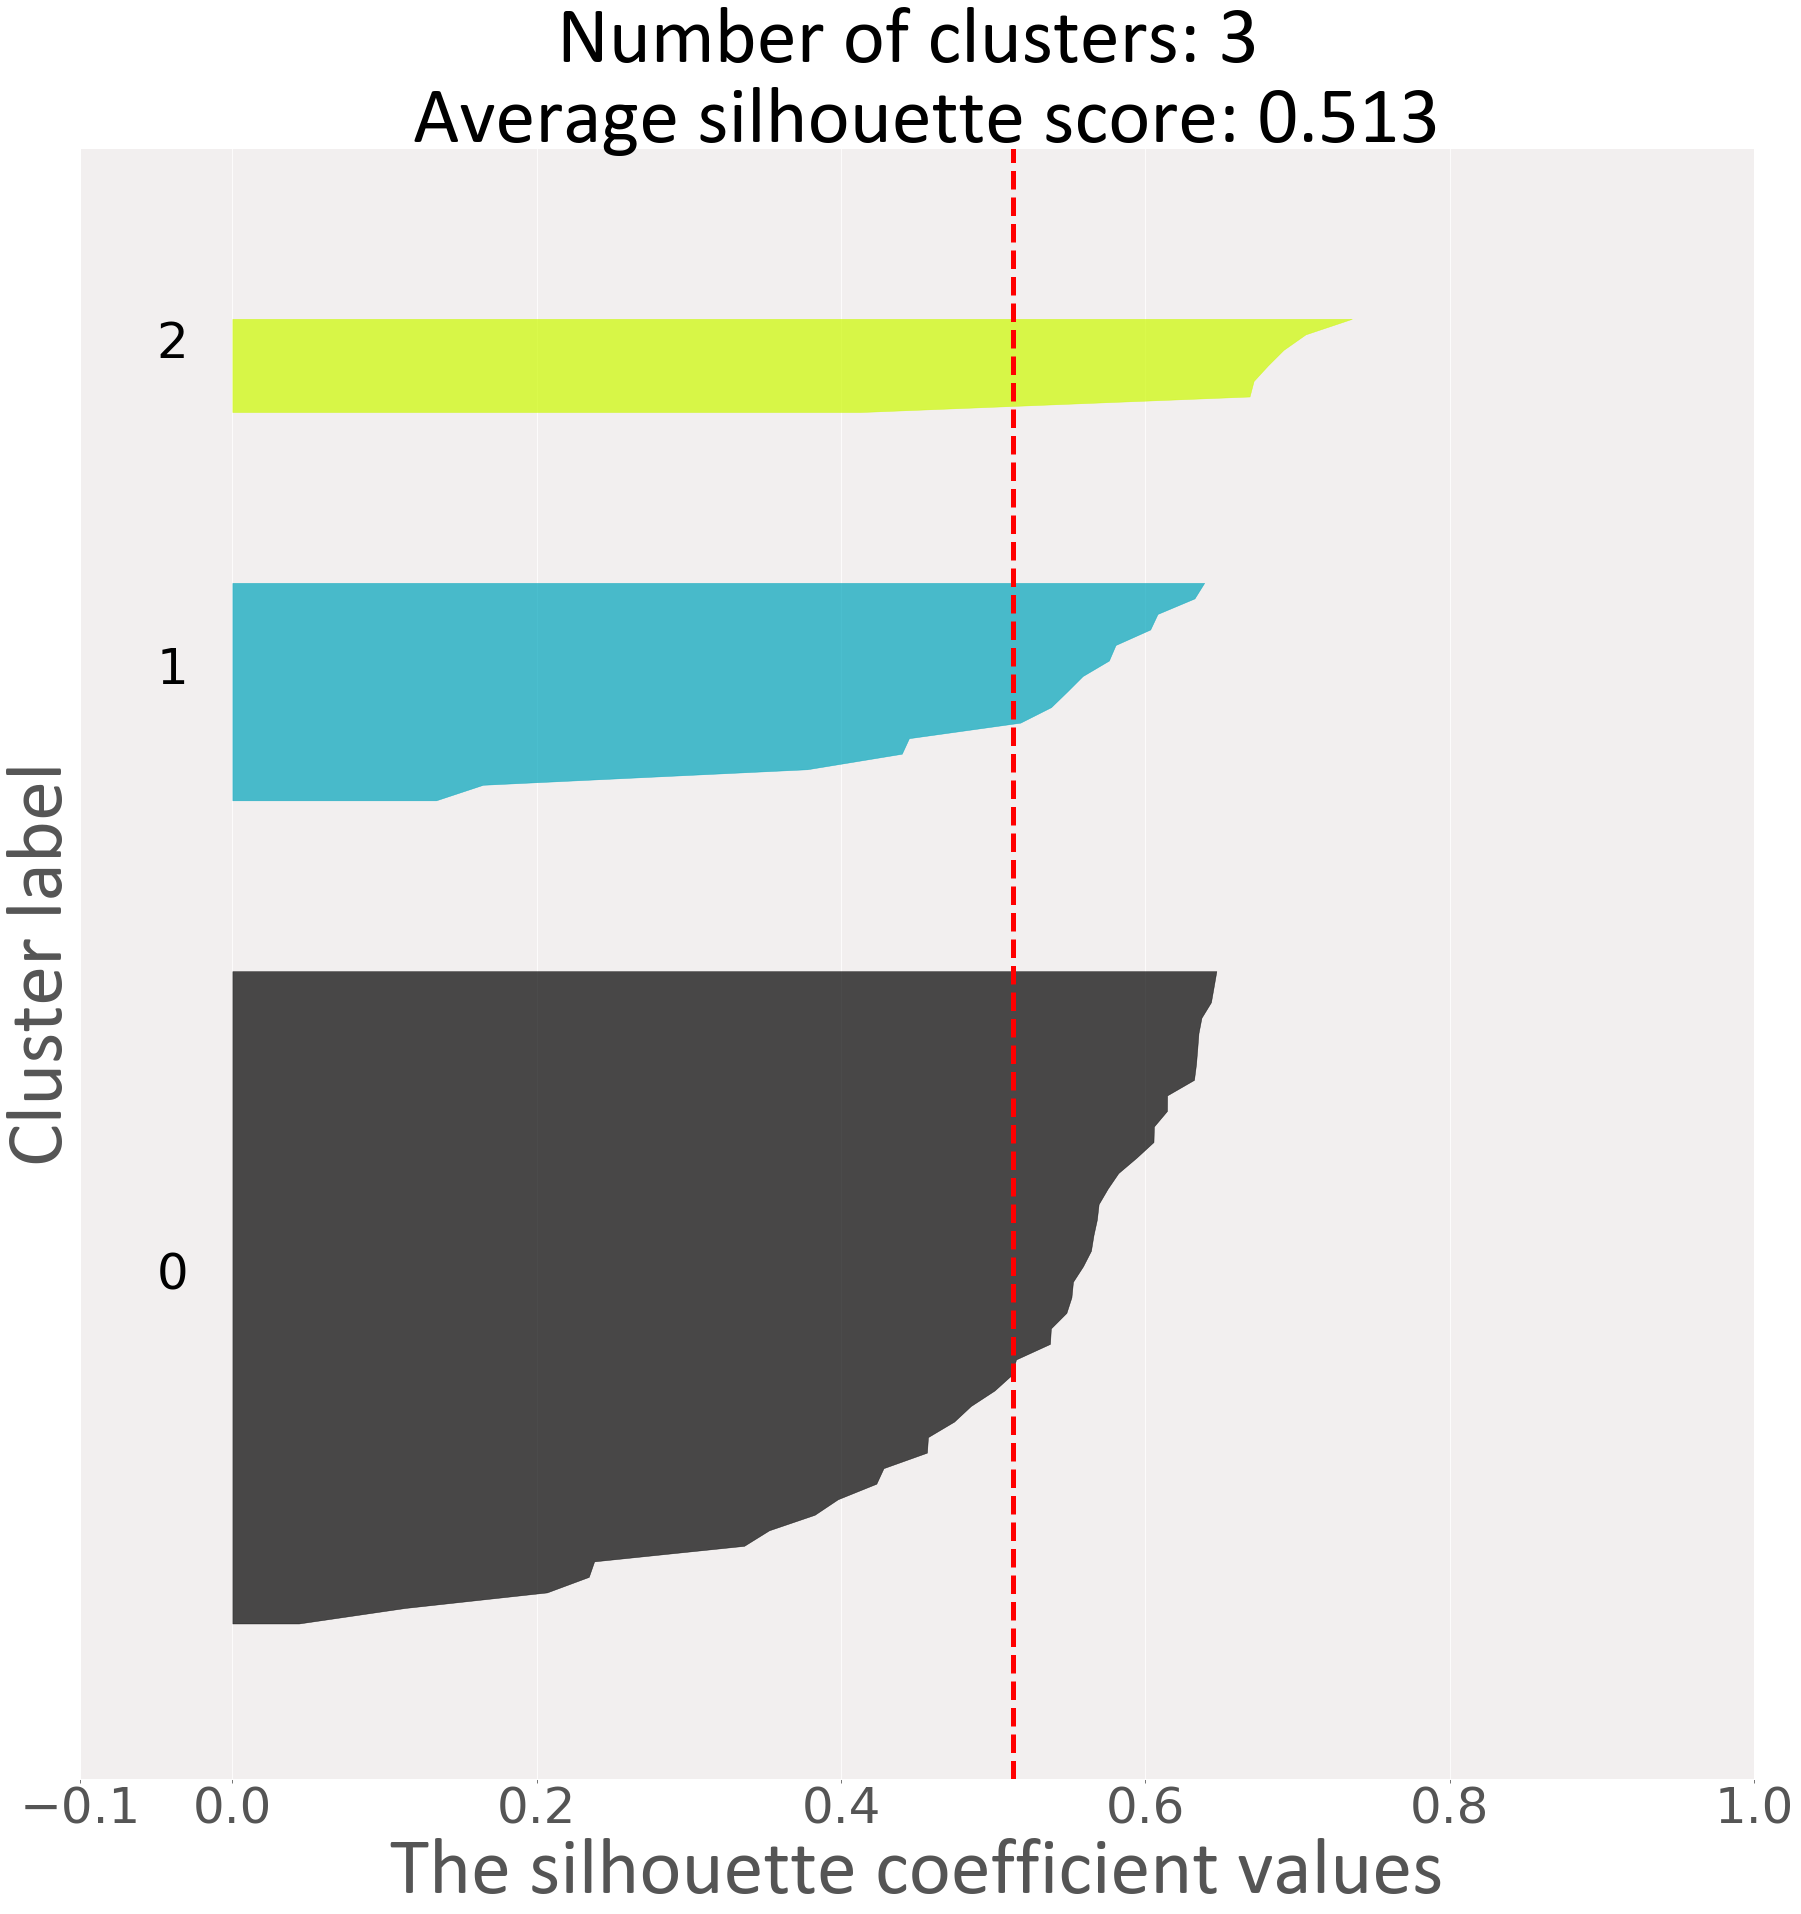

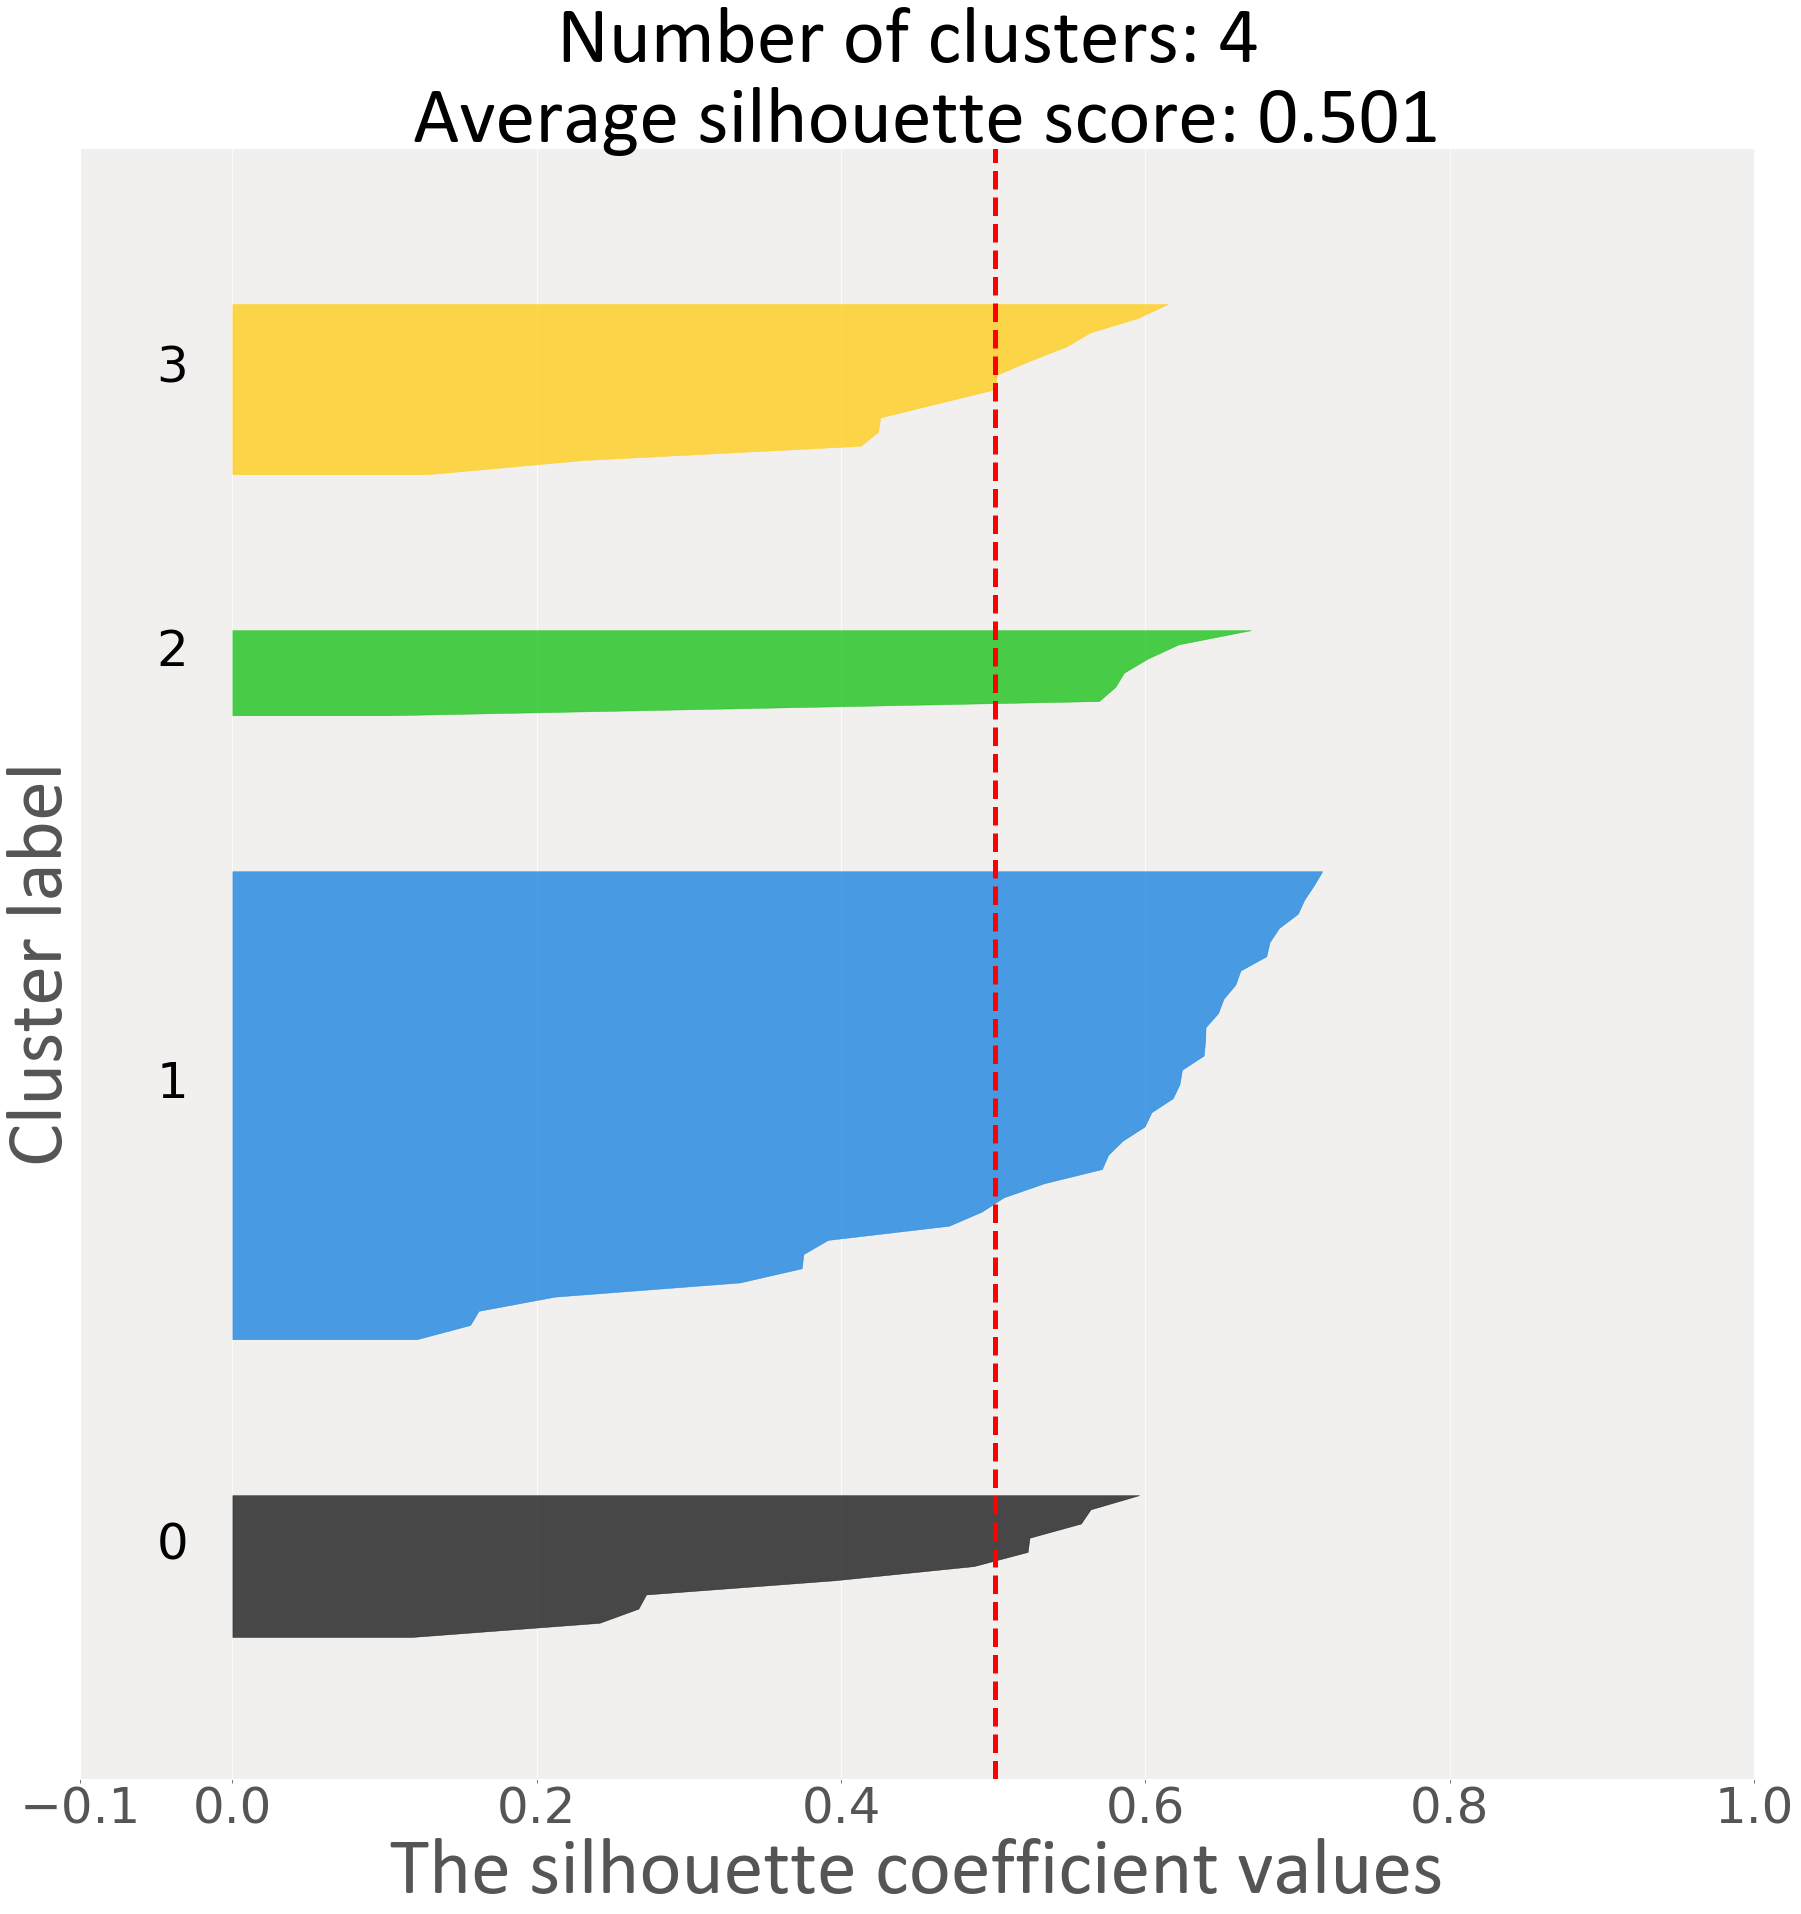

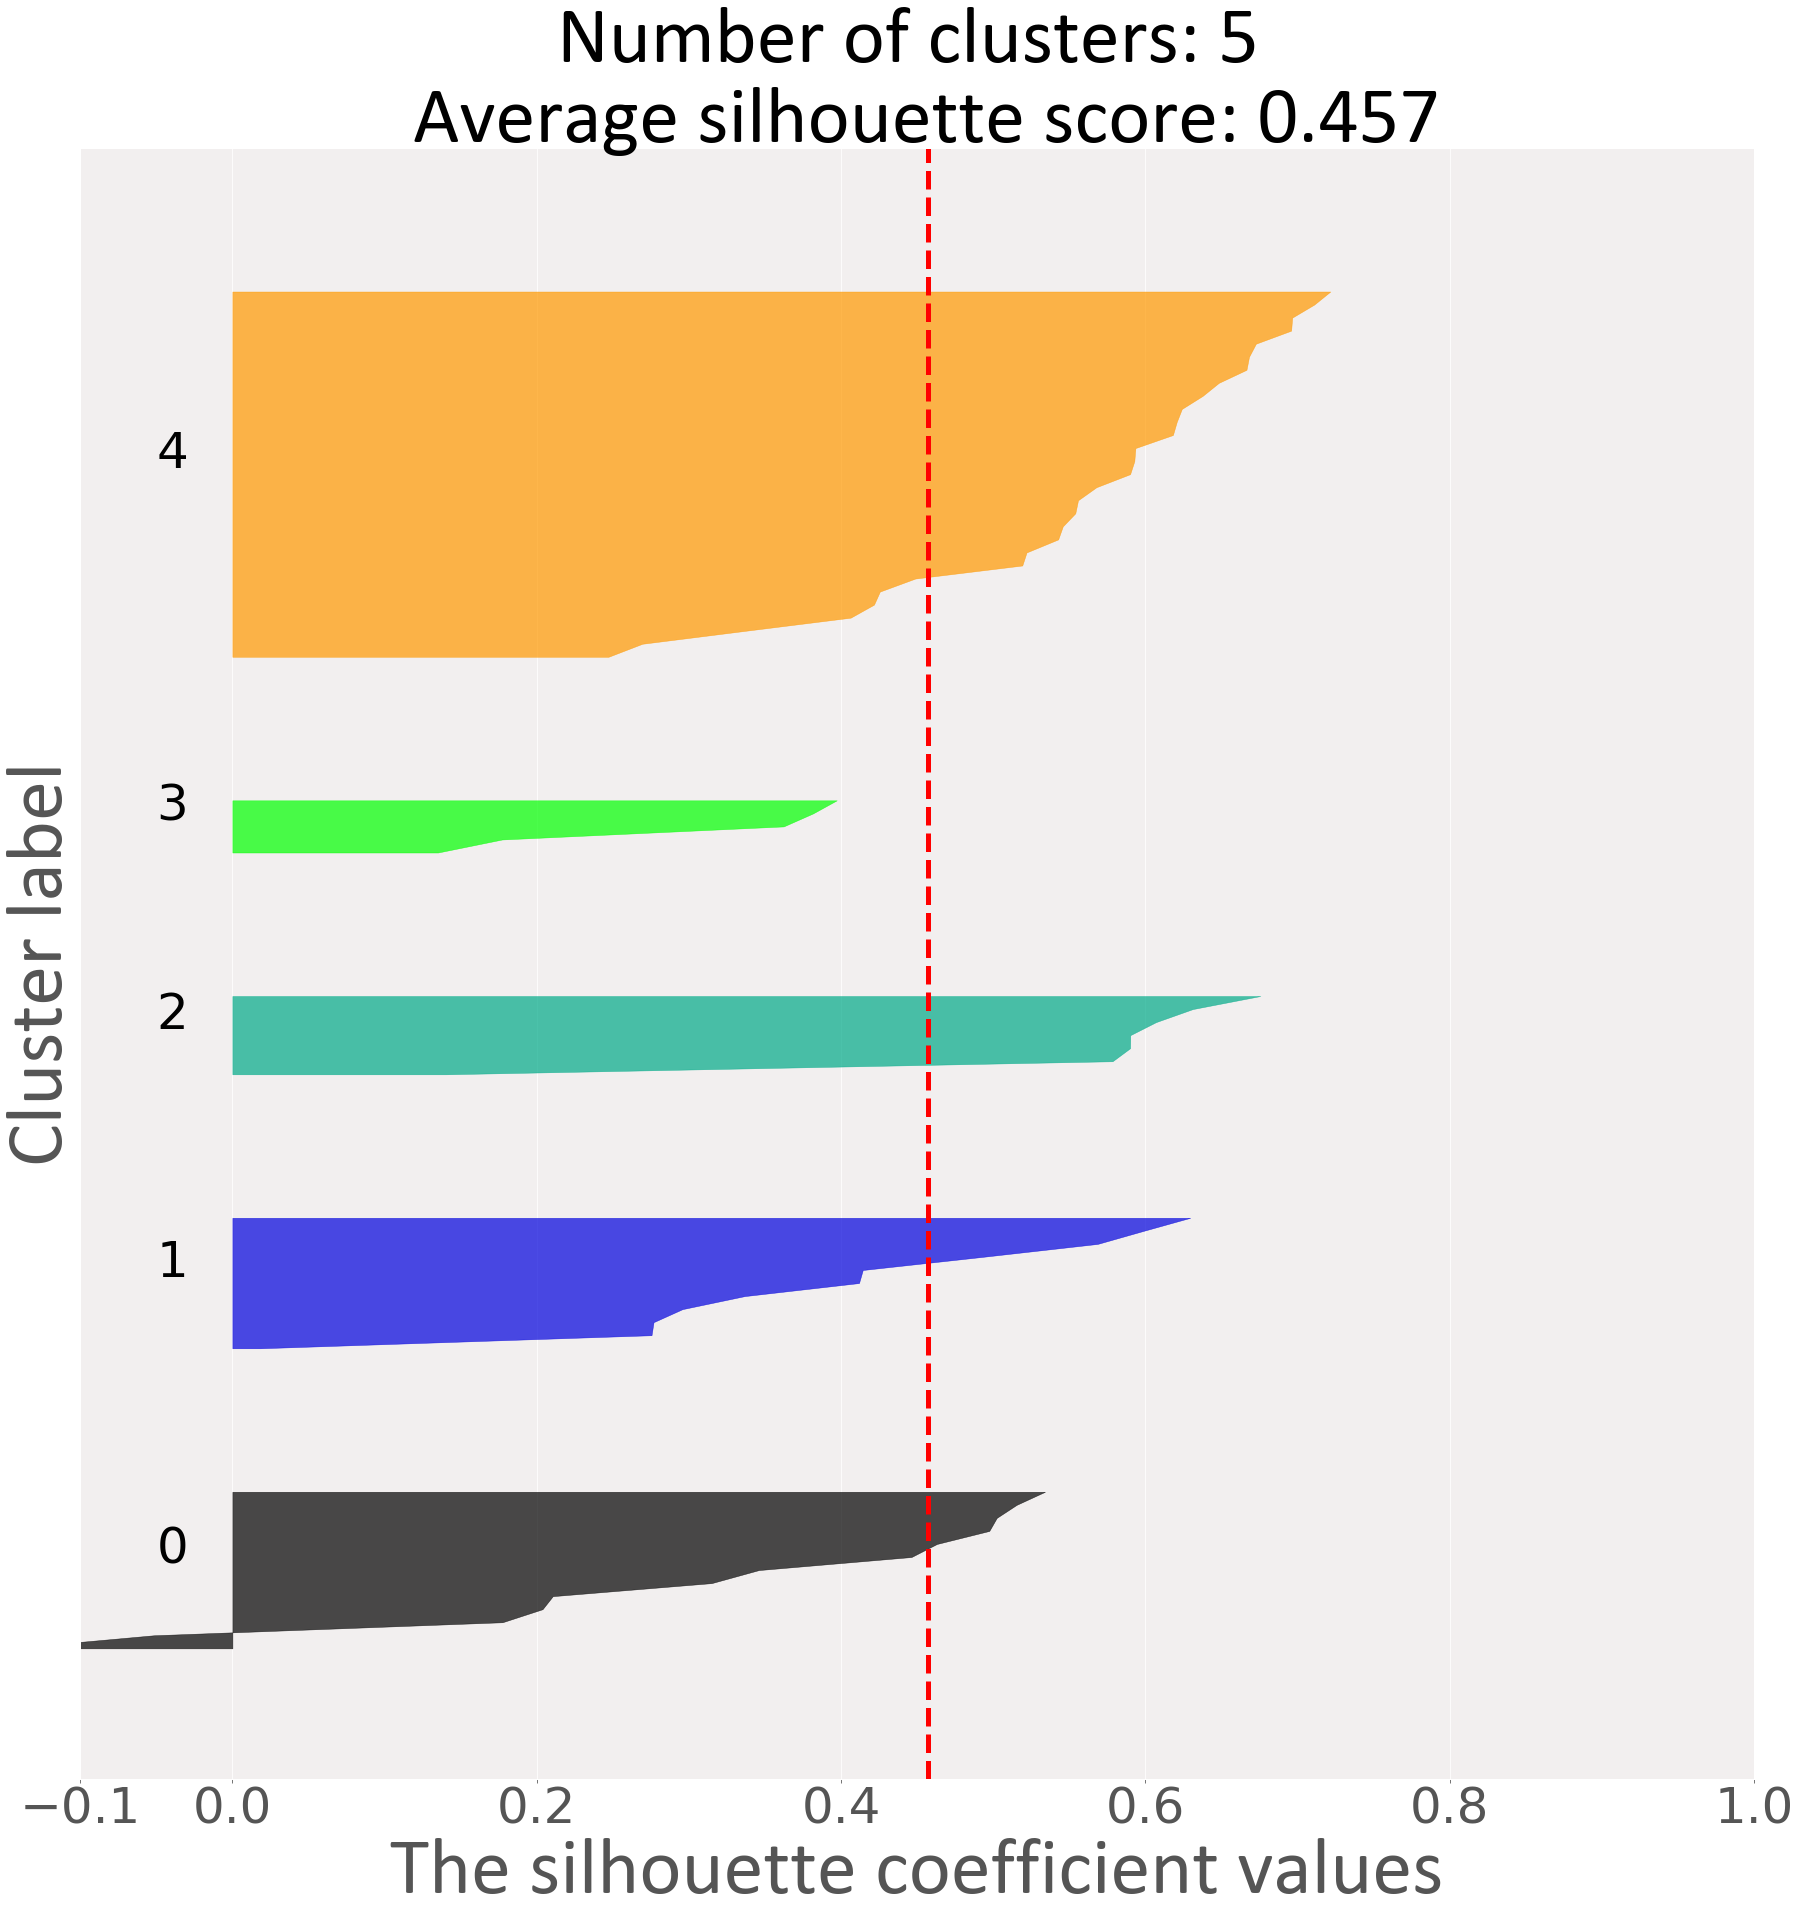

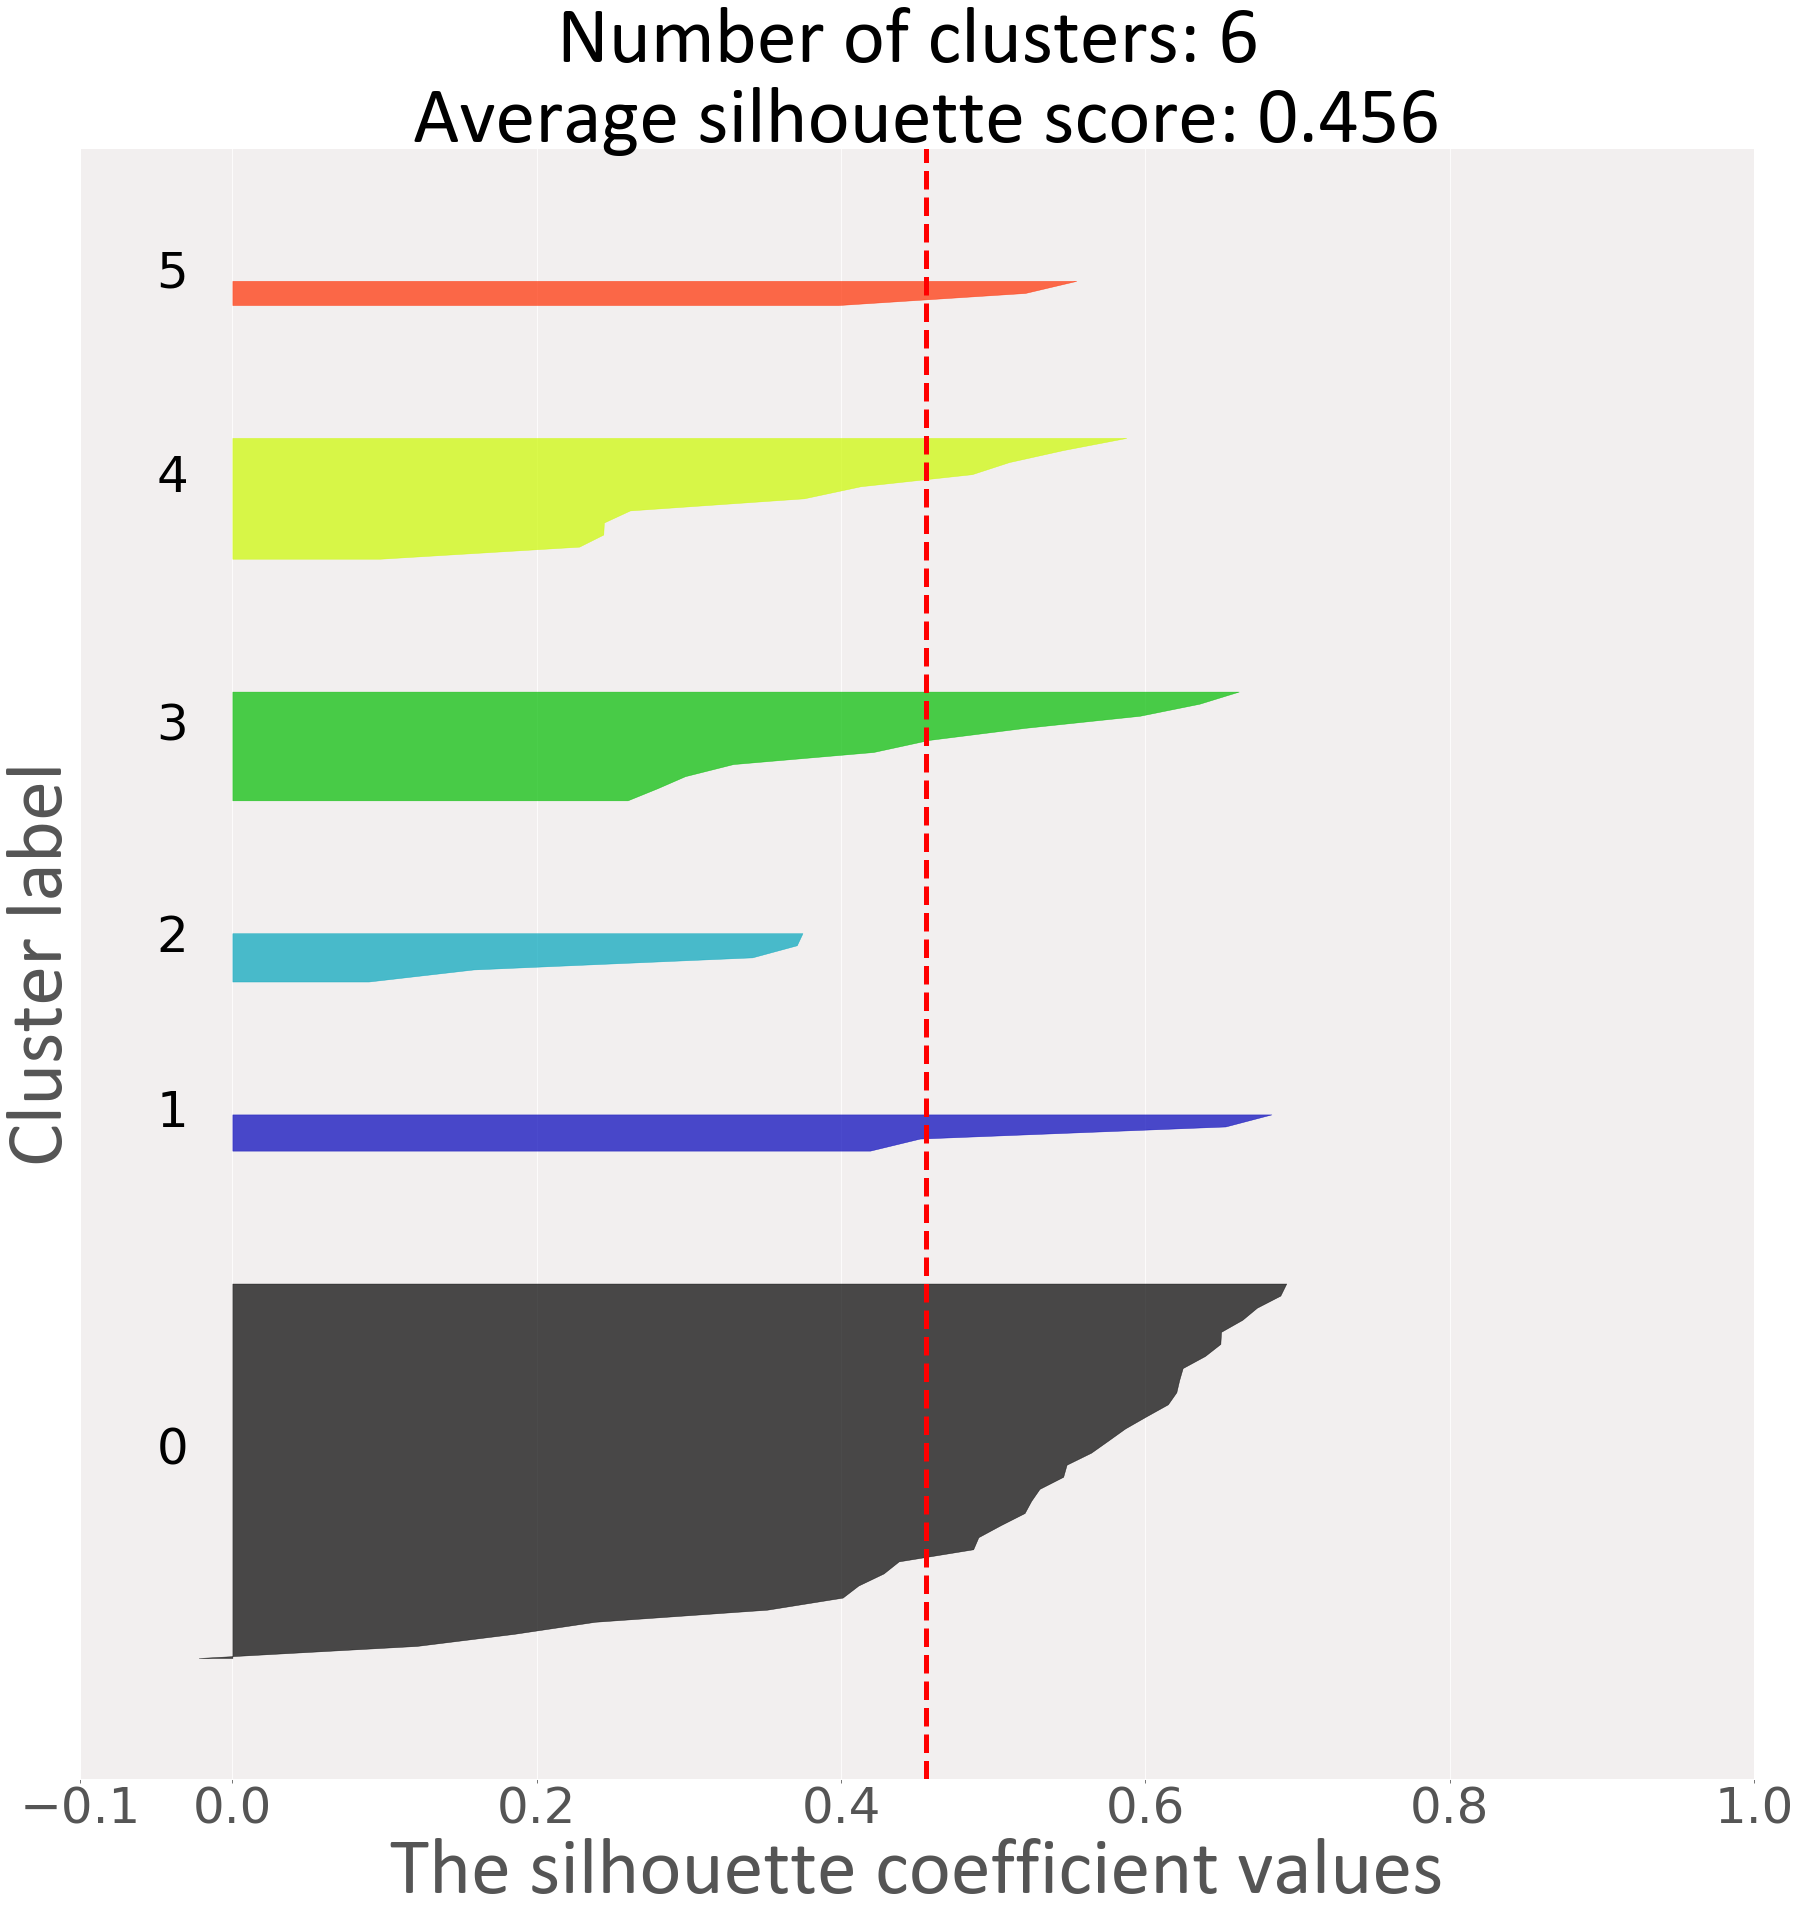

In [248]:
X =scaled_data

range_n_clusters = [2, 3, 4, 5, 6]
silo_aves = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(30, 30)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silo_aves.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=50)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Number of clusters: {} \n Average silhouette score: {}".format(n_clusters,'%.3f'%silhouette_avg), **font, fontsize=80)
    ax1.set_xlabel("The silhouette coefficient values", **font, fontsize=80)
    ax1.set_ylabel("Cluster label", **font, fontsize=80)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=5)
    ax1.tick_params(labelsize=50)
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

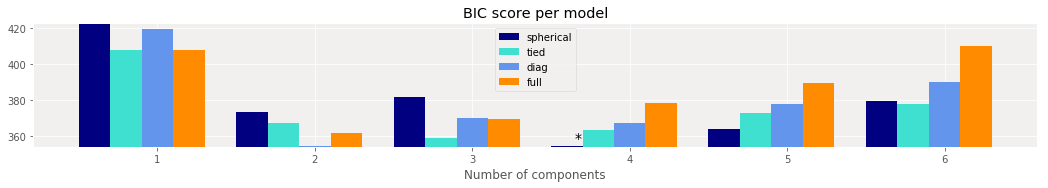

In [24]:
import itertools

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GM(n_components=n_components, covariance_type=cv_type).fit(scaled_data)
        bic.append(gmm.bic(scaled_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)

color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])

bars = []

plt.figure(figsize=(18,5))
spl = plt.subplot(2, 1, 1)


for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Saline scatterplot

In [8]:
df_saline = df[(df['recording']=='Chronic_03_2018-07-29')|(df['recording']=='Chronic_11_2018-08-04')|(df['recording']=='Chronic_13_2018_08_08')|(df['recording']=='Chronic_14_2018-08-14')|(df['recording']=='Chronic_31_2018-08-10')]
df_saline = df_saline[(df_saline['CV ISI'] != 0)&(df_saline['Firing Rate'] != 0)]
df_saline = df_saline[(df_saline['CV ISI']>0.2)&(df_saline['Firing Rate']>0.006)]

In [8]:
scale2 =RobustScaler()
scaled_data2 = scale2.fit_transform(df_saline[['CV ISI', 'Firing Rate']])

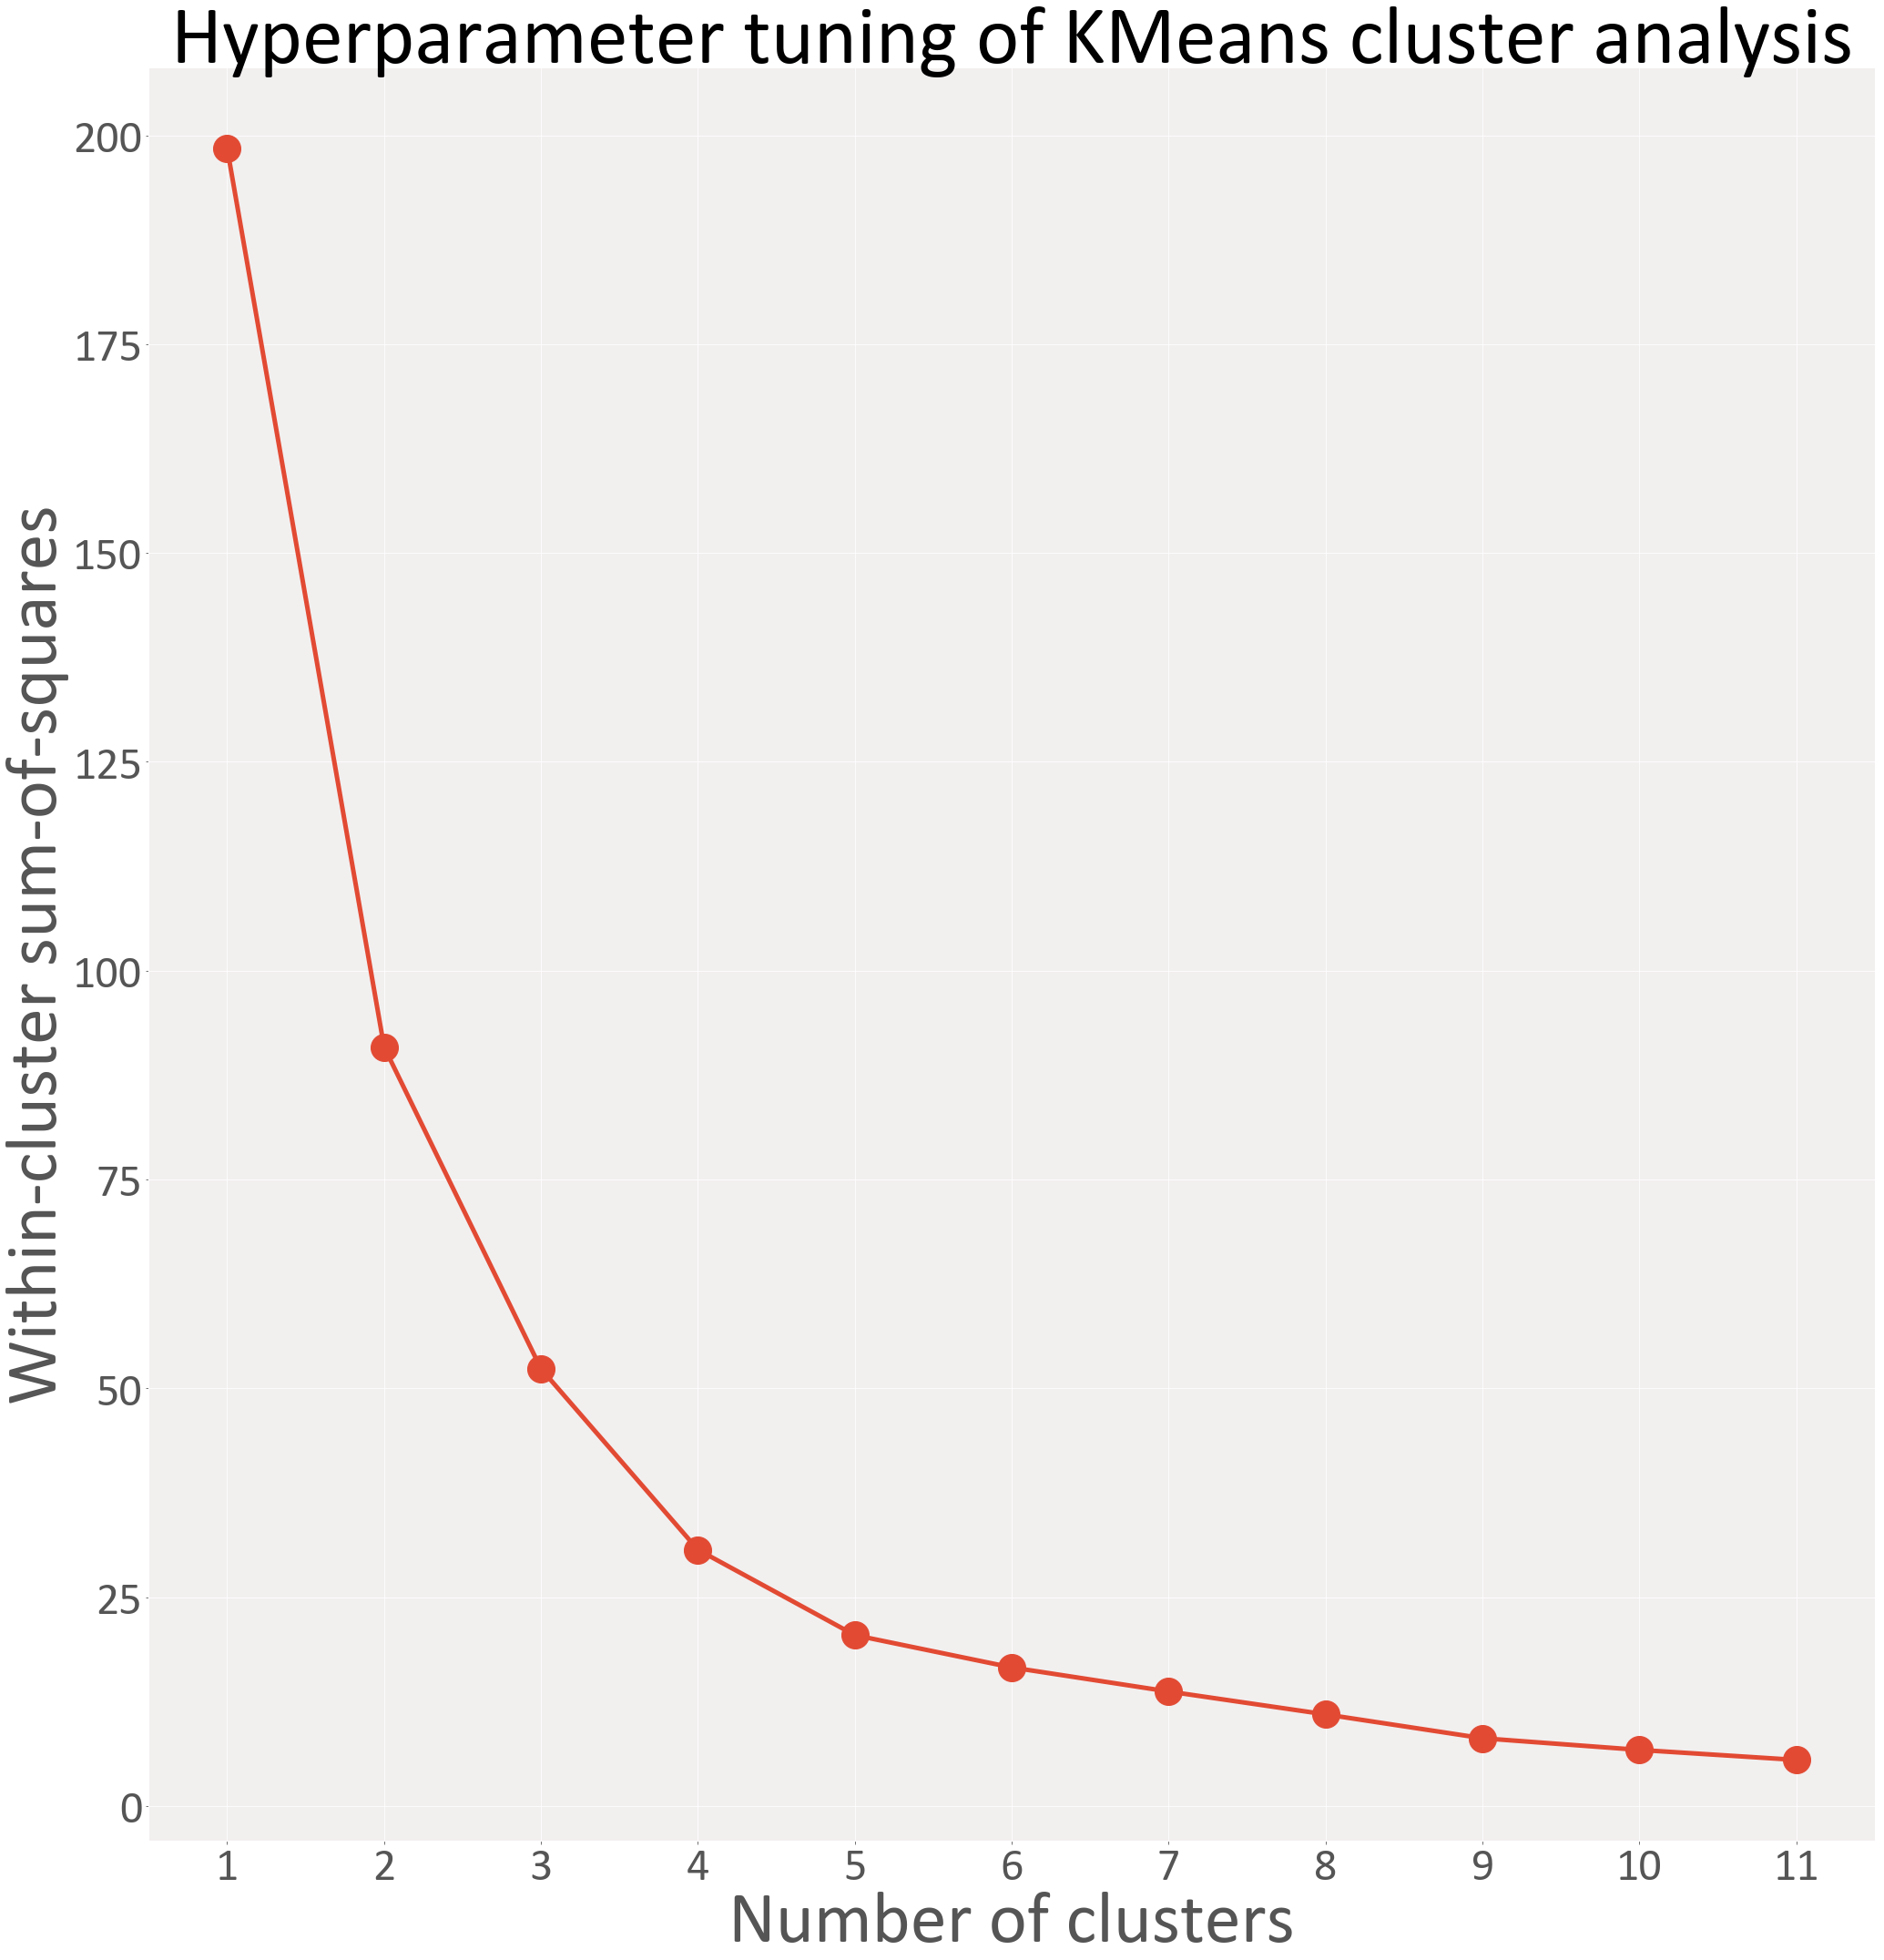

In [9]:
cluster_range = range(1, 12)
data2 = scaled_data2
inertias = []

for clusters_no in cluster_range:
    # Create a KMeans instance with k clusters: model
    test_model = KMeans(clusters_no)
    
    # Fit model to samples
    test_model.fit(data2)
    
    # Append the inertia to the list of inertias
    inertias.append(test_model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(30, 30))
plt.plot(cluster_range, inertias, '-o', linewidth=5, markersize=30)
plt.xlabel('Number of clusters', **font, fontsize=80)
plt.ylabel('Within-cluster sum-of-squares', **font, fontsize=80)
plt.title('Hyperparameter tuning of KMeans cluster analysis', **font, fontsize=90)
plt.xticks(cluster_range, **font, fontsize=50)
plt.yticks(**font, fontsize=50)
plt.tight_layout()
#plt.savefig(r'C:\Users\ASUS\Desktop\Images\Elbow\Elbow.png', dpi=600)
plt.show()

# Pull from previous dataset

In [9]:
df_archive = pd.read_csv(r'G:/Concatenated_stats_with_clusters_4groups.csv')

In [10]:
df_archive.drop(labels=['Cluster_ID', 'Cluster_ID.1', 'Experiment','GMM_labels', 'colors'], axis=1, inplace=True)

In [11]:
df_saline.drop(labels='category', axis=1, inplace=True)

In [12]:
def neuron_category_mapper(row):
    '''
    This is the function we use to categorise neurons as either slow or fast, and as either regular or irregular
    It categorises neurons firing slower than 4.5 Hz as slow and neurons with a CV ISI of less than 0.55 as regular
    '''
    if (row['Firing Rate'] <= 10) & (row['CV ISI'] <= 0.8):
        rate = 'slow'
        reg = 'regular'
    elif (row['Firing Rate'] <= 10) & (row['CV ISI'] >= 0.8):
        rate = 'slow'
        reg = 'irregular'
    elif (row['Firing Rate'] > 10) & (row['Firing Rate'] <25):
        rate= 'fast'
        reg = 'firing'
    else:
        rate= 'V.fast'
        reg = 'firing'
    return ' '.join([rate, reg])


In [13]:
df_saline['category'] = df_saline.apply(neuron_category_mapper, axis=1)


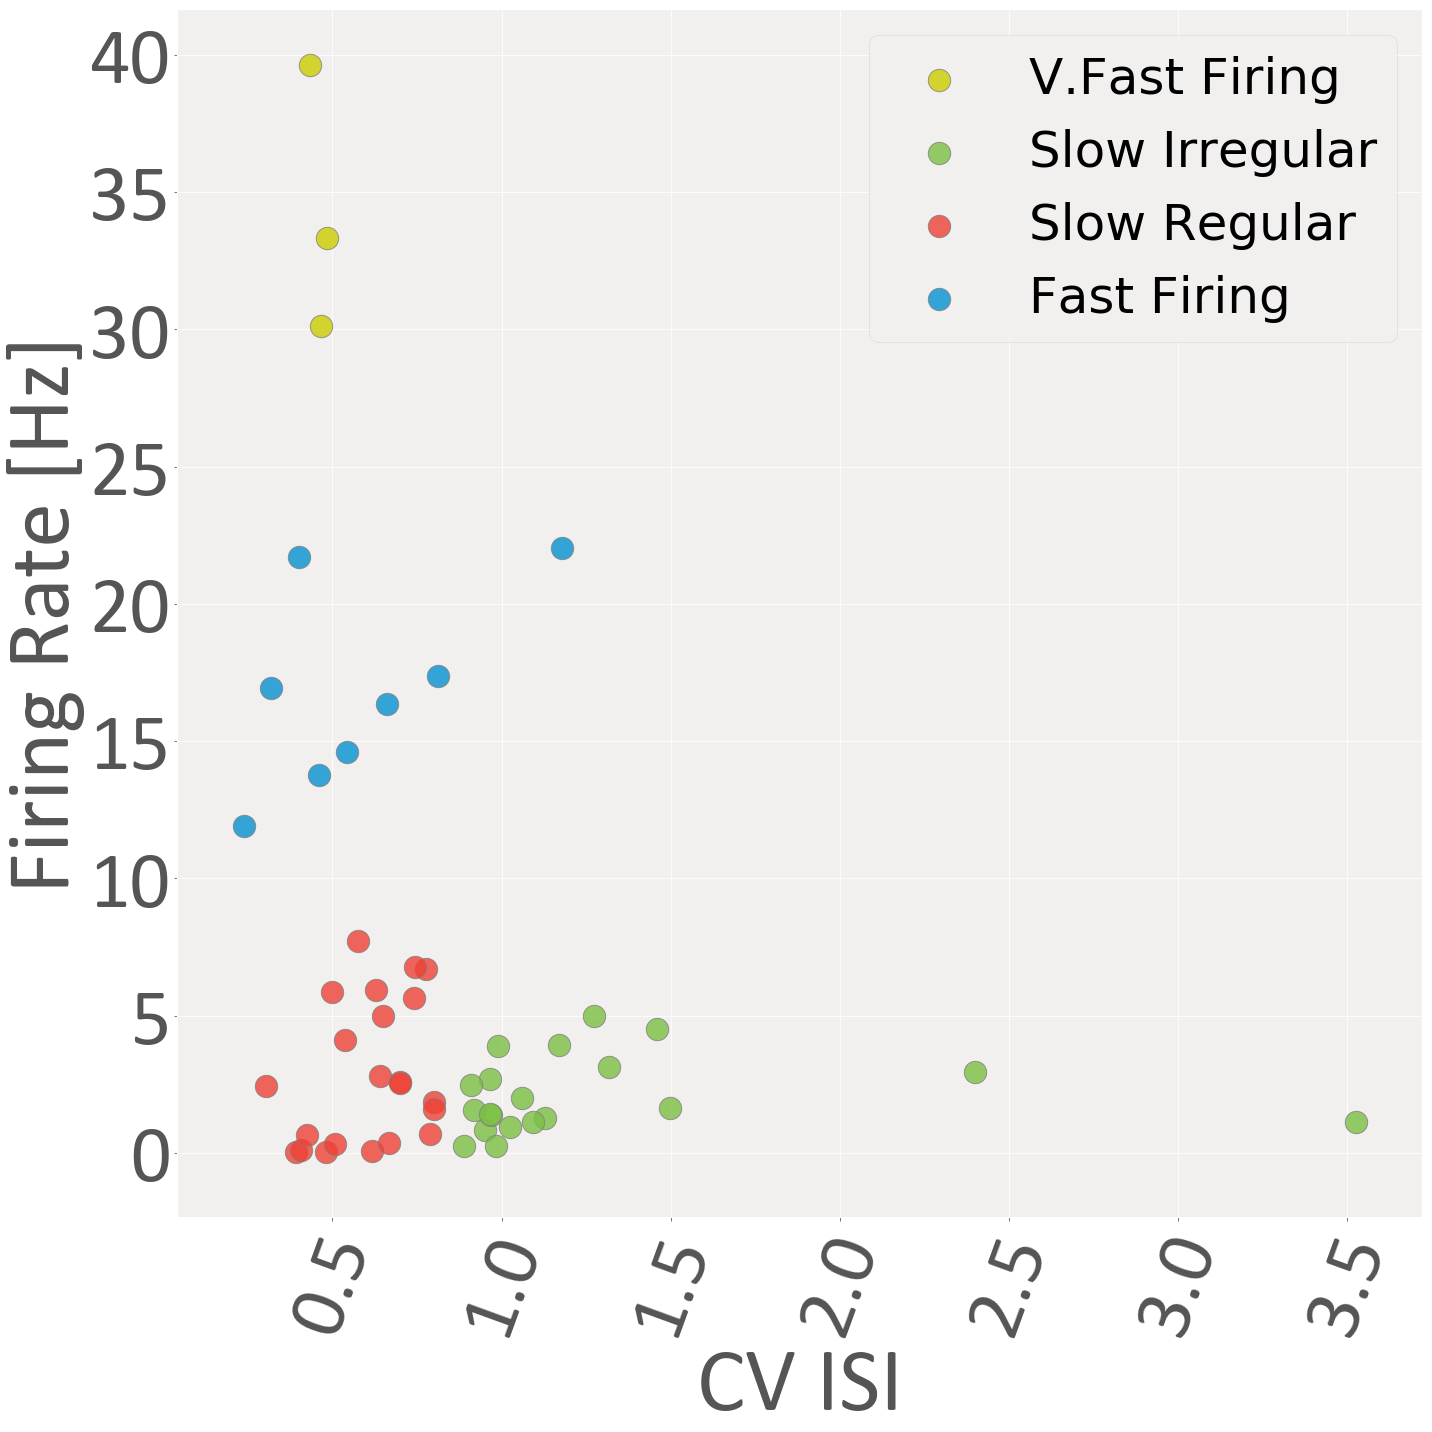

In [15]:
sns.lmplot(data=df_saline, y='Firing Rate', x='CV ISI', fit_reg=False, legend= False, hue='category', scatter_kws={'linewidths':1,'edgecolor':'grey', 's':500, 'alpha':0.8},palette=['#CCCC00','#7bc043', '#ee4035','#0392cf'], size=(20))
plt.xlabel('CV ISI', **font, fontsize=90)
plt.ylabel('Firing Rate [Hz]', **font, fontsize=90)
plt.yticks(**font, fontsize=80)
plt.xticks(**font, fontsize=80, rotation=70)
plt.legend(['V.Fast Firing', 'Slow Irregular', 'Slow Regular', 'Fast Firing'], prop={'size':50})
plt.tight_layout()
#plt.savefig(r'C:\Users\ASUS\Desktop\Images\Clustered Scatterplot\Saline Clusters.png', dpi=600)
plt.show()

In [40]:
df_cit['category'] = df_cit.apply(neuron_category_mapper, axis=1)

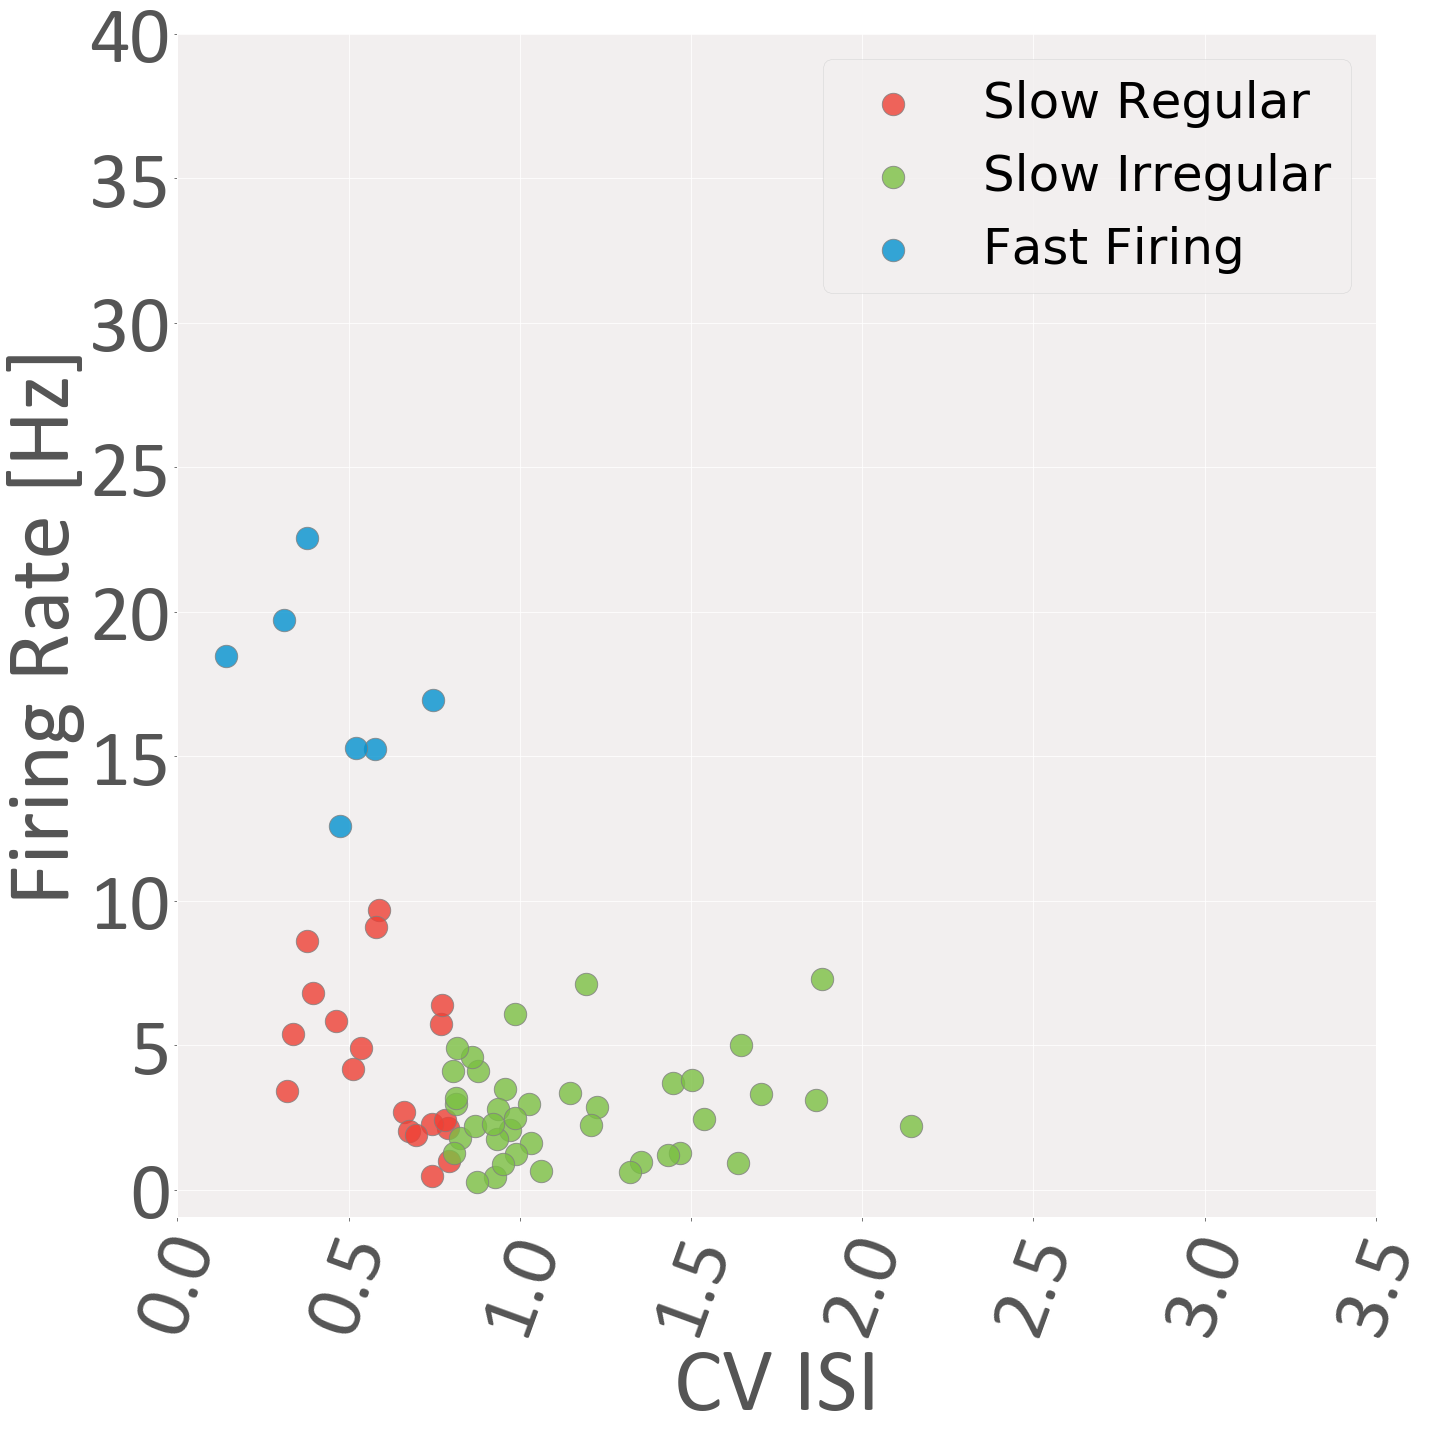

In [45]:
sns.lmplot(data=df_cit, y='Firing Rate', x='CV ISI', fit_reg=False, legend= False, hue='category', scatter_kws={'linewidths':1,'edgecolor':'grey', 's':500, 'alpha':0.8},palette=['#ee4035','#7bc043','#0392cf'], size=(20))
plt.xlabel('CV ISI', **font, fontsize=90)
plt.ylabel('Firing Rate [Hz]', **font, fontsize=90)
plt.yticks(np.arange(0, 45, 5), **font, fontsize=80)
plt.xticks(np.arange(0, 4, 0.5), **font, fontsize=80, rotation=70)
plt.legend(['Slow Regular','Slow Irregular', 'Fast Firing'], prop={'size':50})
plt.tight_layout()
plt.savefig(r'C:\Users\ASUS\Desktop\Images\Clustered Scatterplot\Chronic Cit Clusters.png', dpi=600)
plt.show()

In [108]:
df_cit.groupby('category').count()['spike_cluster']

category
fast firing        7
slow irregular    40
slow regular      19
Name: spike_cluster, dtype: int64

In [109]:
df_saline.groupby('category').count()['spike_cluster']

category
V.fast firing      3
fast firing        8
slow irregular    20
slow regular      22
Name: spike_cluster, dtype: int64

In [110]:
df_pearson=pd.concat([df_cit.groupby('category').count()['spike_cluster'],df_saline.groupby('category').count()['spike_cluster']], axis=1)

In [111]:
df_pearson.columns = ['Chronic Citalopram', 'Control']

In [112]:
df_pearson.fillna(0, inplace=True)

In [113]:
df_pearson = df_pearson.to_excel(r'G:/Pearson.xlsx')

In [123]:
df_pearson = pd.read_excel(r'G:/Pearson.xlsx')

In [124]:
df_pearson

,Chronic Citalopram,Control
V.fast firing,0,3
fast firing,7,8
slow irregular,40,20
slow regular,19,22


In [79]:
df_2 = df_pearson.loc[['slow irregular', 'slow regular'],:]

In [125]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(df_pearson,correction=False)

In [126]:
dof

3

In [129]:
p

0.03454725922454754

In [130]:
df_percent = pd.read_excel(r'G:/Pearson percent.xlsx')

In [133]:
df_percent

,Chronic Citalopram,Control
V.fast firing,0.000000,0.056604
fast firing,0.106061,0.150943
slow irregular,0.606061,0.377358
slow regular,0.287879,0.415094


'#CCCC00','#7bc043', '#ee4035','#0392cf'

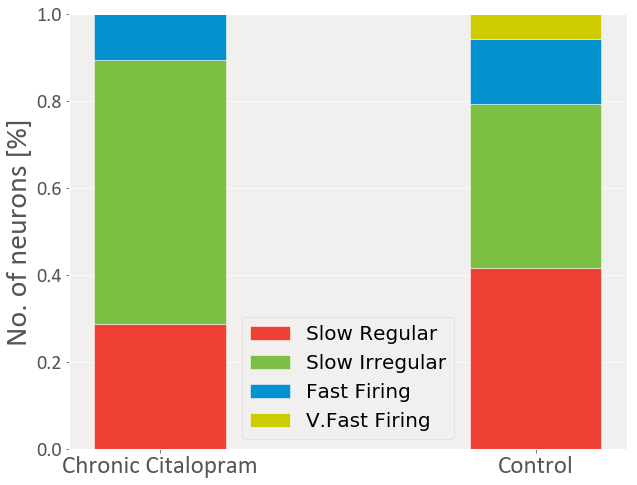

In [159]:
VFast = df_percent.loc['V.fast firing',:]
Fast = df_percent.loc['fast firing',:]
Irreg = df_percent.loc['slow irregular',:]
Reg = df_percent.loc['slow regular',:]


barWidth = 0.35
r = [0,1]
names = ('Chronic Citalopram','Control')

plt.figure(figsize = (10,8))
         
plt.bar(r, Reg, color= '#ee4035', edgecolor='white', width=barWidth)
         
plt.bar(r, Irreg, bottom = Reg, color='#7bc043', edgecolor='white', width=barWidth)
         
plt.bar(r, Fast, bottom = [i+j for i,j in zip(Reg, Irreg)], color='#0392cf', edgecolor='white', width=barWidth)
         
plt.bar(r, VFast, bottom = [a+b+c for a,b,c in zip(Reg, Irreg, Fast)], color='#CCCC00', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names, **font, fontsize=25)
plt.yticks( **font, fontsize=20)
plt.ylabel('No. of neurons [%]', **font, fontsize=30)
plt.legend(['Slow Regular','Slow Irregular', 'Fast Firing', 'V.Fast Firing'], prop={'size':20}, )
plt.savefig(r'C:\Users\ASUS\Desktop\Images\Pearson\Pearson with labels.png', dpi=600)
plt.show()

 

In [16]:
df_concat = pd.concat([df_archive, df_saline],axis=0)

In [19]:
len(df_concat)

127

In [14]:
scale2 =RobustScaler()
scaled_data2 = scale2.fit_transform(df_concat[['CV ISI', 'Firing Rate']])

In [15]:
gmm = GM(n_components=4, covariance_type='diag').fit(scaled_data2)
GMM_labels = gmm.predict(scaled_data2)
df_concat['GMM_labels']=list(GMM_labels)

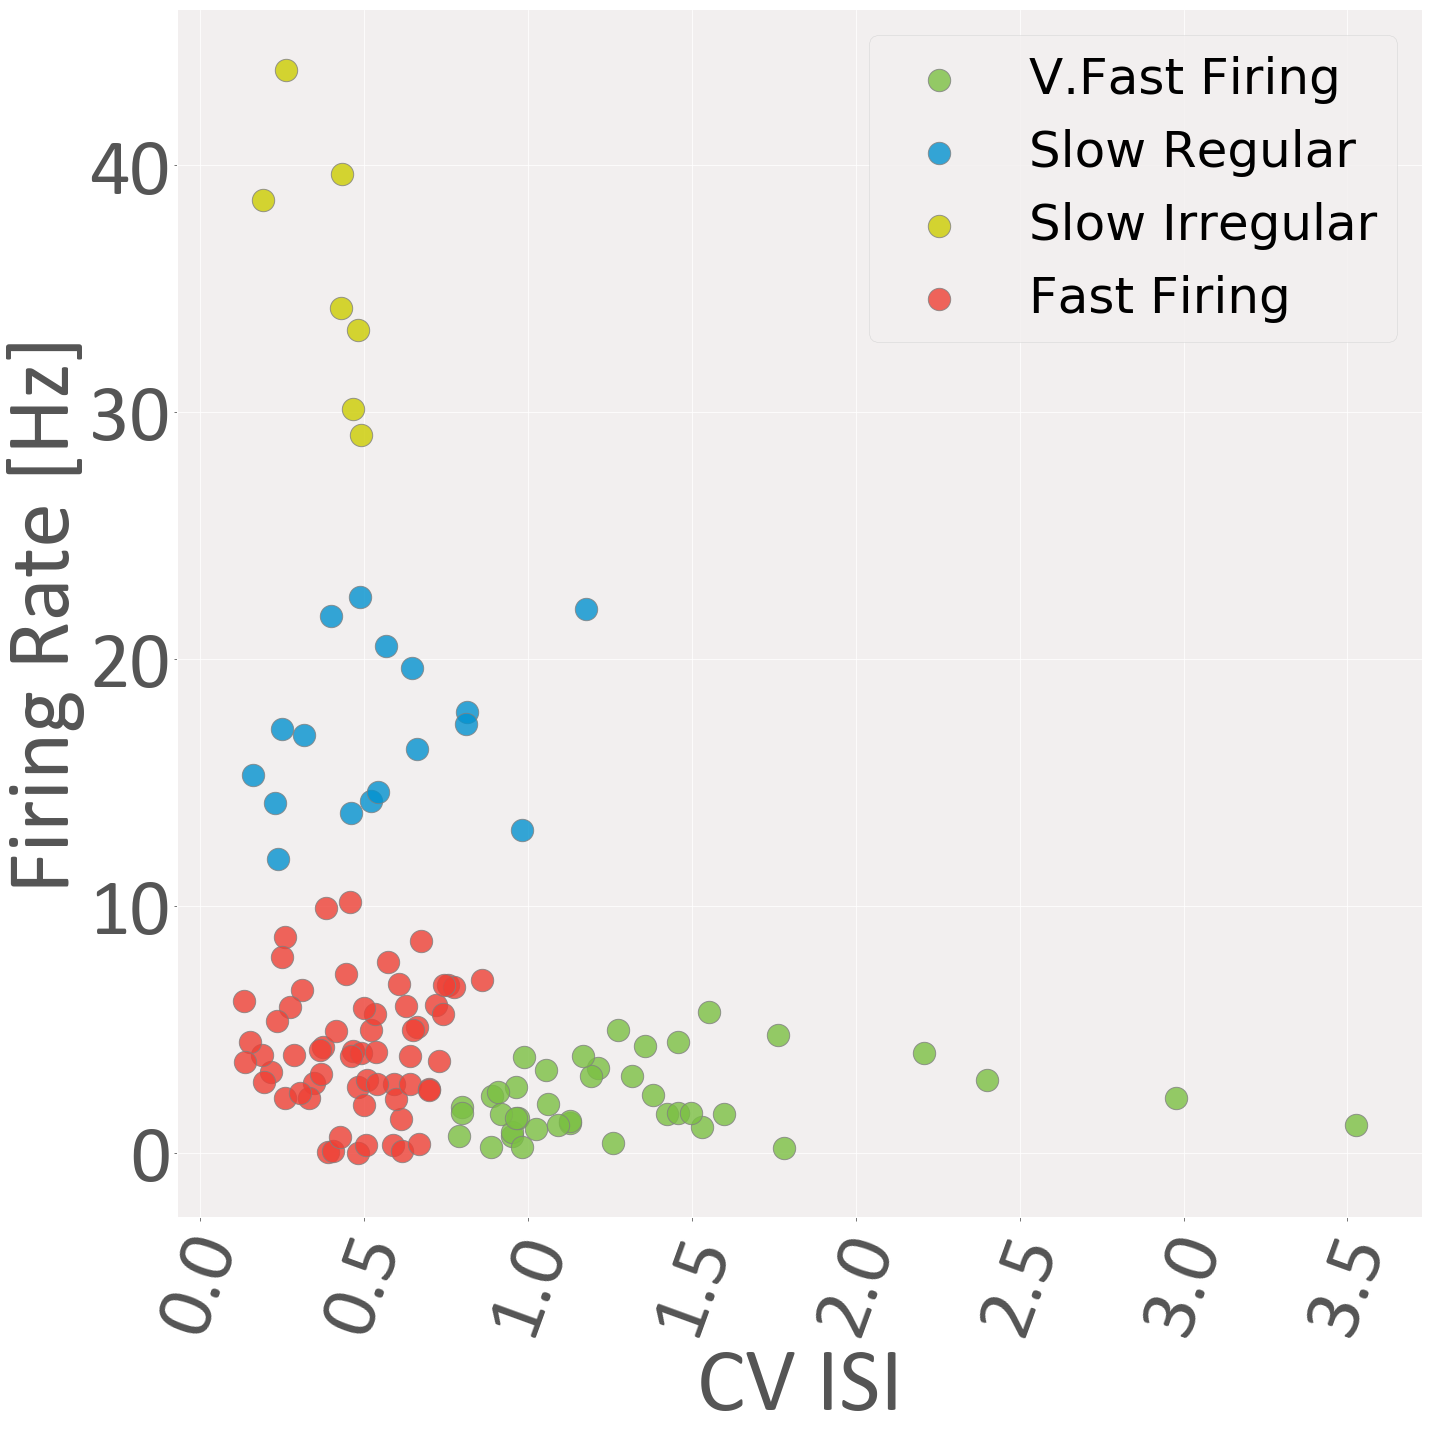

In [19]:
sns.lmplot(data=df_concat, y='Firing Rate', x='CV ISI', fit_reg=False, legend= False, hue='GMM_labels', scatter_kws={'linewidths':1,'edgecolor':'grey', 's':500, 'alpha':0.8},palette=['#7bc043', '#0392cf','#CCCC00', '#ee4035'], size=(20))
plt.xlabel('CV ISI', **font, fontsize=90)
plt.ylabel('Firing Rate [Hz]', **font, fontsize=90)
plt.yticks(**font, fontsize=80)
plt.xticks(**font, fontsize=80, rotation=70)
plt.legend(['V.Fast Firing','Slow Regular', 'Slow Irregular', 'Fast Firing'], prop={'size':50})
plt.tight_layout()
plt.savefig(r'C:\Users\ASUS\Desktop\Images\Clustered Scatterplot\Saline+Previous Clusters.png', dpi=600)
plt.show()

In [170]:
df_summary_stats = df_concat.groupby('category')[['CV ISI', 'Firing Rate']].describe().loc[:, (slice('CV ISI', 'Firing Rate'), ['count', 'mean', 'std', 'min', 'max'])].transpose()
df_summary_stats.to_excel(r'G:\all summary stats.xlsx')

In [167]:
df_concat.drop(labels='category', axis=1, inplace=True)

In [168]:
def add_category_concat(df):
    if df == 1:
        return 'Fast Firing'
    elif df == 0:
        return 'Slow Irregular'
    elif df == 2:
        return 'V.Fast Firing'
    else:
        return 'Slow Regular'

df_concat['category']=df_concat['GMM_labels'].apply(add_category_concat)


In [171]:
df_summary_stats

category           Fast Firing  Slow Irregular  Slow Regular  V.Fast Firing
CV ISI      count    17.000000       41.000000     62.000000       7.000000
            mean      0.545862        1.332321      0.483101       0.394434
            std       0.281743        0.570853      0.181803       0.118148
            min       0.163253        0.789157      0.134320       0.192549
            max       1.178846        3.524964      0.860671       0.491941
Firing Rate count    17.000000       41.000000     62.000000       7.000000
            mean     17.012549        2.206050      4.218566      35.551746
            std       3.304942        1.440422      2.508994       5.377190
            min      11.899722        0.206667      0.015278      29.060000
            max      22.518611        5.714722     10.164444      43.873611

In [172]:
labs = tuple(['Firing Rate', 'CV_ISI'])

out = {}
for category in df_concat['category'].unique():
    cv_isi = df_concat[df_concat['category']==category]['CV ISI']
    fr = df_concat[df_concat['category']==category]['Firing Rate']
    
    for index, arr in enumerate([fr, cv_isi]):
        bs_reps = dcst.draw_bs_reps(arr, np.mean, 10000)  # draw 10000 bs samples, for each, calculate their mean
        confidence_intervals = np.percentile(bs_reps, [2.5, 97.5])
        out[category, labs[index]] = confidence_intervals

In [173]:
out

{('Fast Firing', 'CV_ISI'): array([0.41956951, 0.67978491]),
 ('Fast Firing', 'Firing Rate'): array([15.48980106, 18.51885907]),
 ('Slow Irregular', 'CV_ISI'): array([1.17487865, 1.52088987]),
 ('Slow Irregular', 'Firing Rate'): array([1.79460789, 2.65051897]),
 ('Slow Regular', 'CV_ISI'): array([0.43808126, 0.5272656 ]),
 ('Slow Regular', 'Firing Rate'): array([3.6043797 , 4.82260562]),
 ('V.Fast Firing', 'CV_ISI'): array([0.30830108, 0.4677113 ]),
 ('V.Fast Firing', 'Firing Rate'): array([31.93738095, 39.32184921])}

In [21]:
df_chosen_cluster = df_concat[(df_concat['spike_cluster'] == 154) | (df_concat['spike_cluster'] == 147) | (df_concat['spike_cluster'] == 159) |(df_concat['spike_cluster'] == 98) & (df_concat['recording'] == '2018-05-20_05')]

In [24]:
def map_color(df):
    if df == 1:
        return '#0392cf'
    elif df == 0:
        return '#7bc043'
    elif df == 2:
        return '#CCCC00'
    else:
        return '#ee4035' 

df_chosen_cluster['colors']=df_chosen_cluster['GMM_labels'].apply(map_color)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


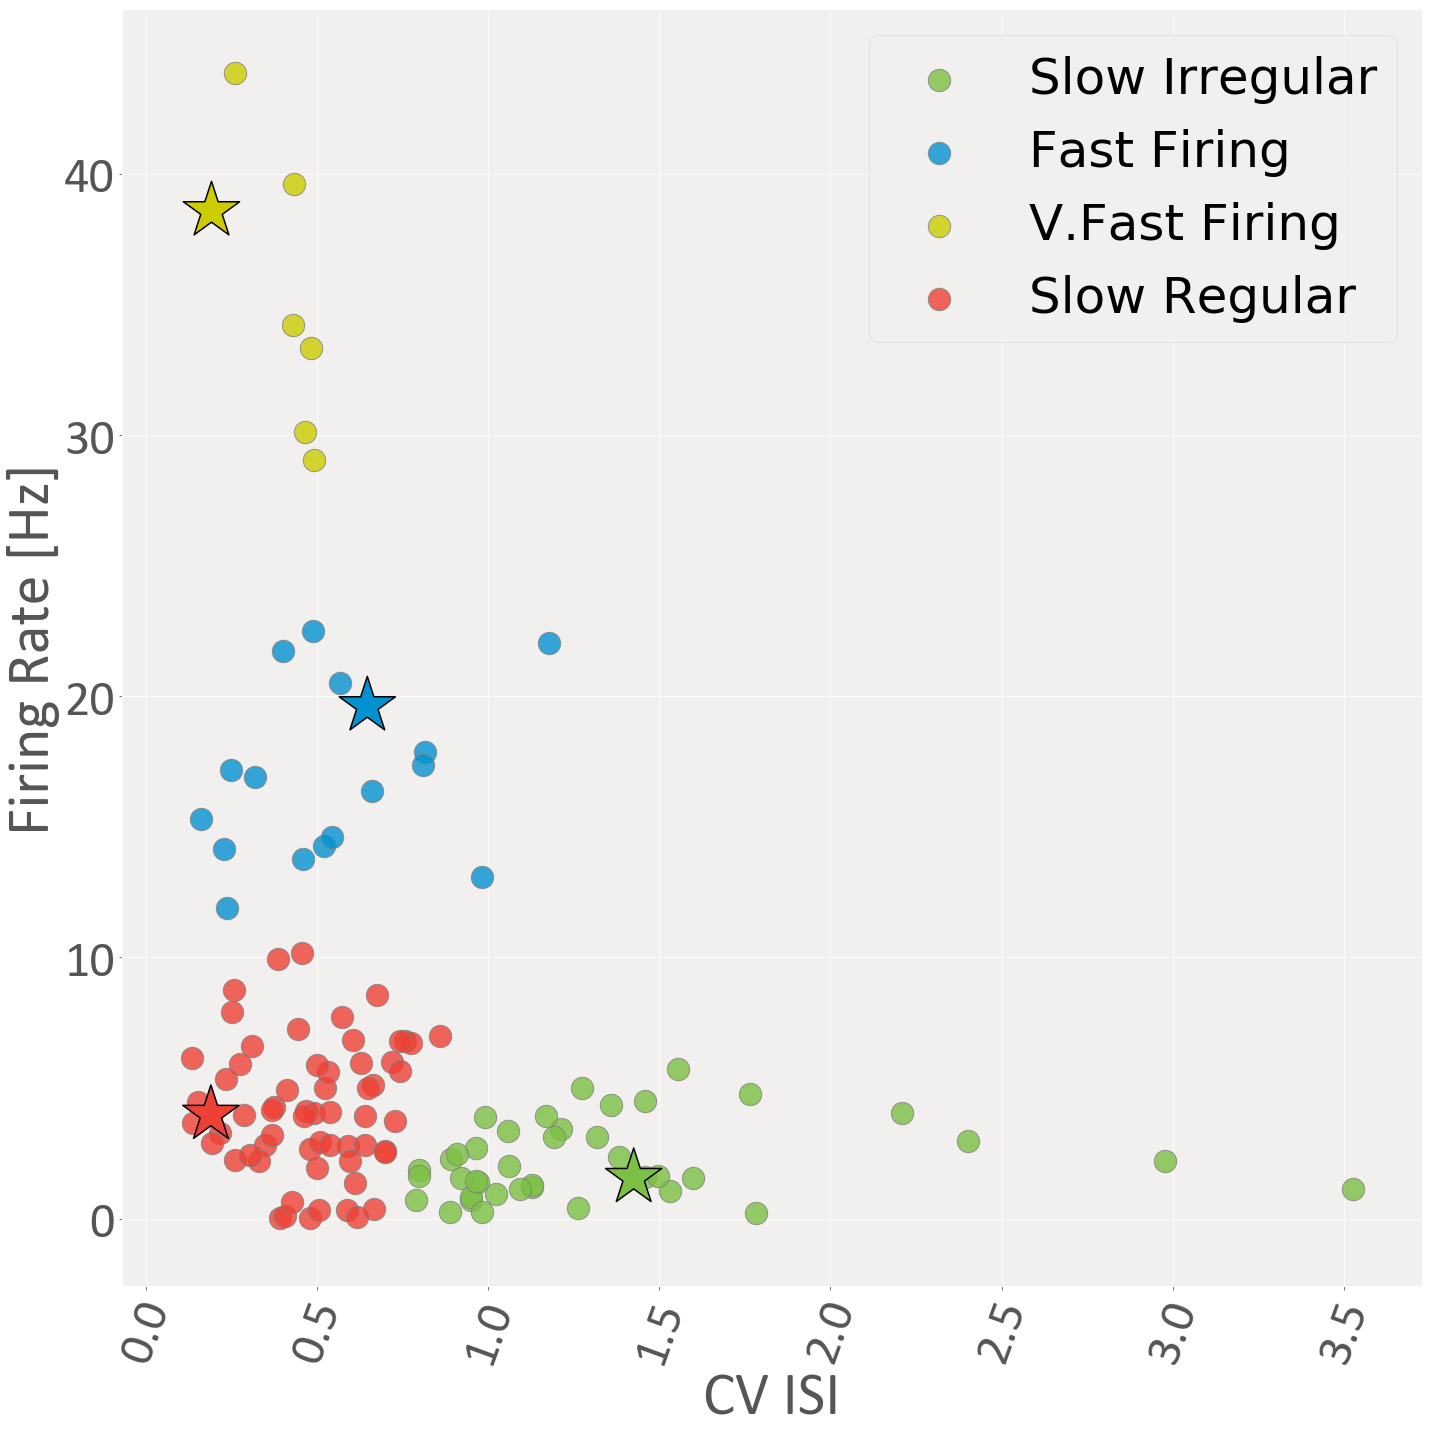

In [26]:
path = r'C:\Users\ASUS\Desktop\Images'
sns.lmplot(data=df_concat, y='Firing Rate', x='CV ISI', fit_reg=False, legend= False, hue='GMM_labels', scatter_kws={'linewidths':1,'edgecolor':'grey', 's':500, 'alpha':0.8},palette=['#7bc043', '#0392cf','#CCCC00', '#ee4035'], size=(20))
plt.scatter(x=df_chosen_cluster['CV ISI'], y=df_chosen_cluster['Firing Rate'], c=df_chosen_cluster['colors'], alpha=1, s=3500, edgecolors='k', linewidths=1.5, marker='*')
#plt.title('Scatterplot of Hierarchical Clustering', **font, fontsize=60)
plt.xlabel('CV ISI', **font, fontsize=60)
plt.ylabel('Firing Rate [Hz]', **font, fontsize=60)
plt.yticks(**font, fontsize=50)
plt.xticks(**font, fontsize=50, rotation=70)
plt.legend(['Slow Irregular', 'Fast Firing','V.Fast Firing', 'Slow Regular'], prop={'size':50})
plt.tight_layout()
plt.savefig(os.sep.join([path, 'Clustered Scatterplot', 'Clustered Scatterplot2.png']), dpi=600)
plt.show()



In [90]:
df_saline.drop(labels='category', axis=1, inplace=True)

In [324]:
df_summary_saline = df_saline.groupby('category')[['CV ISI', 'Firing Rate']].describe().loc[:, (slice('CV ISI', 'Firing Rate'), ['count', 'mean', 'std', 'min', 'max'])].transpose()

In [325]:
df_summary_saline

category           Fast Firing  Slow Irregular  Slow Regular  V.Fast Firing
CV ISI      count     8.000000        2.000000     40.000000       3.000000
            mean      0.576709        2.962960      0.823781       0.461409
            std       0.305154        0.794794      0.291364       0.024818
            min       0.238720        2.400956      0.304605       0.434715
            max       1.178846        3.524964      1.496988       0.483785
Firing Rate count     8.000000        2.000000     40.000000       3.000000
            mean     16.838090        2.040139      2.552972      34.368704
            std       3.590935        1.289095      2.171686       4.841483
            min      11.899722        1.128611      0.015278      30.122222
            max      22.048889        2.951667      7.736389      39.640833

In [322]:
def add_category2(df):
    if df == 1:
        return 'Slow Regular'
    elif df == 0:
        return 'V.Fast Firing'
    elif df == 2:
        return 'Slow Irregular'
    else:
        return 'Fast Firing'

df_saline['category']=df_saline['GMM_labels'].apply(add_category2)

In [180]:
df_saline['name tag'] = df_saline.apply(generate_name_tag, axis=1)

In [181]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

trace = go.Scatter(
    x = df_saline['CV ISI'],
    y = df_saline['Firing Rate'],
    mode = 'markers',
    text = df_saline['name tag']
)

layout= go.Layout(
    title= 'Scatterplot of CV ISI vs Firing Rate',
    autosize=False,
    width=700,
    height=700,
    hovermode= 'closest',
    xaxis= dict(
        title= 'CV ISI',
        ticklen= 5,
        zeroline= False,
        gridwidth= 1,
    ),
    yaxis=dict(
        title='Firing Rate',
        ticklen=5,
        gridwidth=1,
    ),
    showlegend=False
)

data = [trace]
fig = go.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
plotly.offline.iplot(fig)

In [164]:
df_saline = df_saline[(df_saline['CV ISI']<0.2)&(df_saline['Firing Rate']<0.006)]

In [21]:
def load_data(path, csv_file_name):
    if not csv_file_name.endswith('.csv'):
        csv_file_name = ''.join([csv_file_name, '.csv'])
    file_path = os.path.join(path, csv_file_name)
    return pd.read_csv(file_path)


def manipulate_df(df):
    df['spike'] = 1
    df['time'] = pd.to_timedelta(df['time'], unit='s')
    return df


def create_ts(df, rolling_period, resample_period=1):
    df = df.pivot_table(index='time',
                        columns='ID_rec',
                        values='spike',
                        aggfunc='count')
    df = df.resample('s').count()
    if rolling_period:
        df = df.rolling(rolling_period).mean()
    return df

def calculate_neuron_mfr(col, num_mins_per_bin, total_time):
    num_bins = np.int(total_time / num_mins_per_bin)
    col_bins = np.array_split(col, num_bins)
    mfrs = pd.Series(np.zeros(num_bins))

    for ind, col_bin in enumerate(col_bins):
        spike_times = pd.to_numeric(col_bin[col_bin.notnull()].index.values)
        try:
            spike_train = SpikeTrain(times=spike_times,
                                     t_stop=spike_times[-1],
                                     units=ns)
            mfr = mean_firing_rate(spike_train)
        except IndexError:
            mfr = np.nan
        mfrs[ind] = mfr
    mfrs *= 10**10
    return mfrs


def get_baseline_stats(df, condition_label, resample_period):
    df = df[df['condition'] == condition_label]
    df = create_ts(df=df,
                   rolling_period=False,
                   resample_period=resample_period)
    condition_means = df.transpose().mean(axis=1)
    condition_stds = df.transpose().std(axis=1)
    condition_sorted = condition_means.sort_values()
    return condition_means, condition_stds, condition_sorted


def normalise(df, method, condition_means, condition_stds, condition_sorted):
    if method == 'zscore':
        def f(col):
            return (col.subtract(condition_means)).divide(condition_stds)
    elif method == 'percent':
        def f(col):
            return col.divide(condition_means) * 100
    elif not method:
        def f(col):
            print('Note: No Normalisation Method Provided')
            return col
    df = df.transpose().apply(f)
    return df.reindex(condition_sorted.index)


def select_neruon_cat(ts_df, df_all_neurons, recording, category_column, category):
    clusters = df_all_neurons[(df_all_neurons['recording'] == recording) & (df_all_neurons[category_column] == category)]['spike_cluster'].unique()
    return ts_df[ts_df.index.isin(clusters)]


def plot_heatmap_separate_categories(ts_df, df_all_neurons, recording, category_column, vmin, vmax, normalise_method, out_folder):

    num_categories = len(df_all_neurons['category'].unique())
    f, a = plt.subplots(nrows=num_categories, ncols=1, figsize=(19, 25))

    for index, category in enumerate(df_all_neurons[category_column].unique()):
        df_cat = select_neruon_cat(ts_df=ts_df,
                                   df_all_neurons=df_all_neurons,
                                   recording=recording,
                                   category_column=category_column,
                                   category=category)

        recording_len = df_cat.transpose().index.max().seconds
        x_tick_pos = round(recording_len / 4)

        sns.heatmap(data=df_cat,
                    cmap='coolwarm',
                    vmin=vmin,
                    vmax=vmax,
                    ax=a.flat[index],
                    xticklabels=x_tick_pos,
                    cbar_kws={'label': f'{normalise_method} Baseline mean'})

        a.flat[index].set_xticklabels(list(map(lambda num:
                                               str(round(recording_len / 4 / 60 * num, -1)),
                                               [0, 1, 2, 3])))
        a.flat[index].set_title(category)
    plt.suptitle(recording, fontsize=15)
    plt.tight_layout()
    plt.savefig(gen_fig_path(out_folder, recording))
    
def find_category(df_rec):
    library = {}
    for ID_rec in df_rec.ID_rec.unique():
        library[(ID_rec)] = df_rec[df_rec['ID_rec']==ID_rec]['category'].unique()[0]
    return library


def gen_fig_path(out_folder, recording):
    if not os.path.exists(out_folder):
        os.mkdir(out_folder)
    return ''.join([os.path.join(out_folder, recording), '.png'])


In [22]:
font = {'fontname':'Calibri'}
csv_dir = r'E:\CIT_WAY\dat_files\cat\csvs'
csv_file_name = 'all_neurons_ts_with_clusters'
resample_period = '5sec'
rolling_periods=120
normalisation_method = 'percent'
vmin=0
vmax=200
color_list = ['#0392cf', '#CCCC00', '#7bc043', '#ee4035']   ###Modify the values here to change the label colors

In [23]:
df_all_data = load_data(path=csv_dir,
                            csv_file_name=csv_file_name)

In [24]:
df_cit_ts = df_all_data[(df_all_data['recording']=='Chronic_04_2018-08-05')|(df_all_data['recording']=='Chronic_30_2018-07-28')|(df_all_data['recording']=='Chronic_40_2018-08-13')|(df_all_data['recording']=='Chronic_41_2018-08-09')]

In [25]:
df_rec_cit = manipulate_df(df=df_cit_ts)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
df_rec_cit['ID_rec'] = df_rec_cit['spike_cluster'].astype(str) + ', ' + df_rec_cit['recording']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_rec_cit =df_rec_cit[(df_rec_cit['ID_rec']=='99, Chronic_04_2018-08-05')|
          (df_rec_cit['ID_rec']=='119, Chronic_04_2018-08-05')|
          (df_rec_cit['ID_rec']=='107, Chronic_04_2018-08-05')|
          (df_rec_cit['ID_rec']=='101, Chronic_04_2018-08-05')|
          (df_rec_cit['ID_rec']=='92, Chronic_04_2018-08-05')|
          (df_rec_cit['ID_rec']=='97, Chronic_04_2018-08-05')|
          (df_rec_cit['ID_rec']=='64, Chronic_41_2018-08-09')|
          (df_rec_cit['ID_rec']=='75, Chronic_41_2018-08-09')|
          (df_rec_cit['ID_rec']=='84, Chronic_41_2018-08-09')|
          (df_rec_cit['ID_rec']=='68, Chronic_41_2018-08-09')|
          (df_rec_cit['ID_rec']=='98, Chronic_40_2018-08-13')|
          (df_rec_cit['ID_rec']=='62, Chronic_40_2018-08-13')|
          (df_rec_cit['ID_rec']=='96, Chronic_40_2018-08-13')|
          (df_rec_cit['ID_rec']=='122, Chronic_30_2018-07-28')|
          (df_rec_cit['ID_rec']=='100, Chronic_40_2018-08-13')]

In [49]:
heatmap_index = []
category_reminder = {}
for category in df_rec_cit['category'].unique():
    one_type = df_rec_cit[df_rec_cit['category']==category]['ID_rec'].unique().tolist()
    heatmap_index.extend(one_type)
    category_reminder[category] = one_type

In [50]:
base_means, base_stds, base_sorted = get_baseline_stats(df=df_rec_cit,
                                                                condition_label='Baseline',
                                                                resample_period=resample_period)

df_ts = create_ts(df=df_rec_cit,
                           resample_period=resample_period,
                           rolling_period=rolling_periods)

df_ts = normalise(df=df_ts,
                           method=normalisation_method,
                           condition_means=base_means,
                           condition_stds=base_stds,
                           condition_sorted=base_sorted)

In [51]:
max_time = df_rec_cit['time'].max()
maxtime = max_time.total_seconds()/60

In [52]:
df_ts = df_ts.fillna(value=0)
df_ts = df_ts.reindex(index=heatmap_index)

In [53]:
category_reminder

{'fast firing': ['107, Chronic_04_2018-08-05',
  '119, Chronic_04_2018-08-05',
  '122, Chronic_30_2018-07-28',
  '68, Chronic_41_2018-08-09'],
 'slow irregular': ['101, Chronic_04_2018-08-05',
  '97, Chronic_04_2018-08-05',
  '92, Chronic_04_2018-08-05',
  '96, Chronic_40_2018-08-13',
  '62, Chronic_40_2018-08-13'],
 'slow regular': ['99, Chronic_04_2018-08-05',
  '98, Chronic_40_2018-08-13',
  '64, Chronic_41_2018-08-09',
  '75, Chronic_41_2018-08-09',
  '84, Chronic_41_2018-08-09']}

In [54]:
catergories_dict = find_category(df_rec_cit)
categories = pd.Series(catergories_dict)
colors = pd.Series(catergories_dict).apply(lambda x: color_list[3] if x == 'slow regular' else color_list[2] if x == 'slow irregular' else color_list[0] if x == 'fast firing' else color_list[1])

In [55]:
df_colors = pd.concat([categories, colors], axis=1)
df_colors.columns = ['category', 'color']

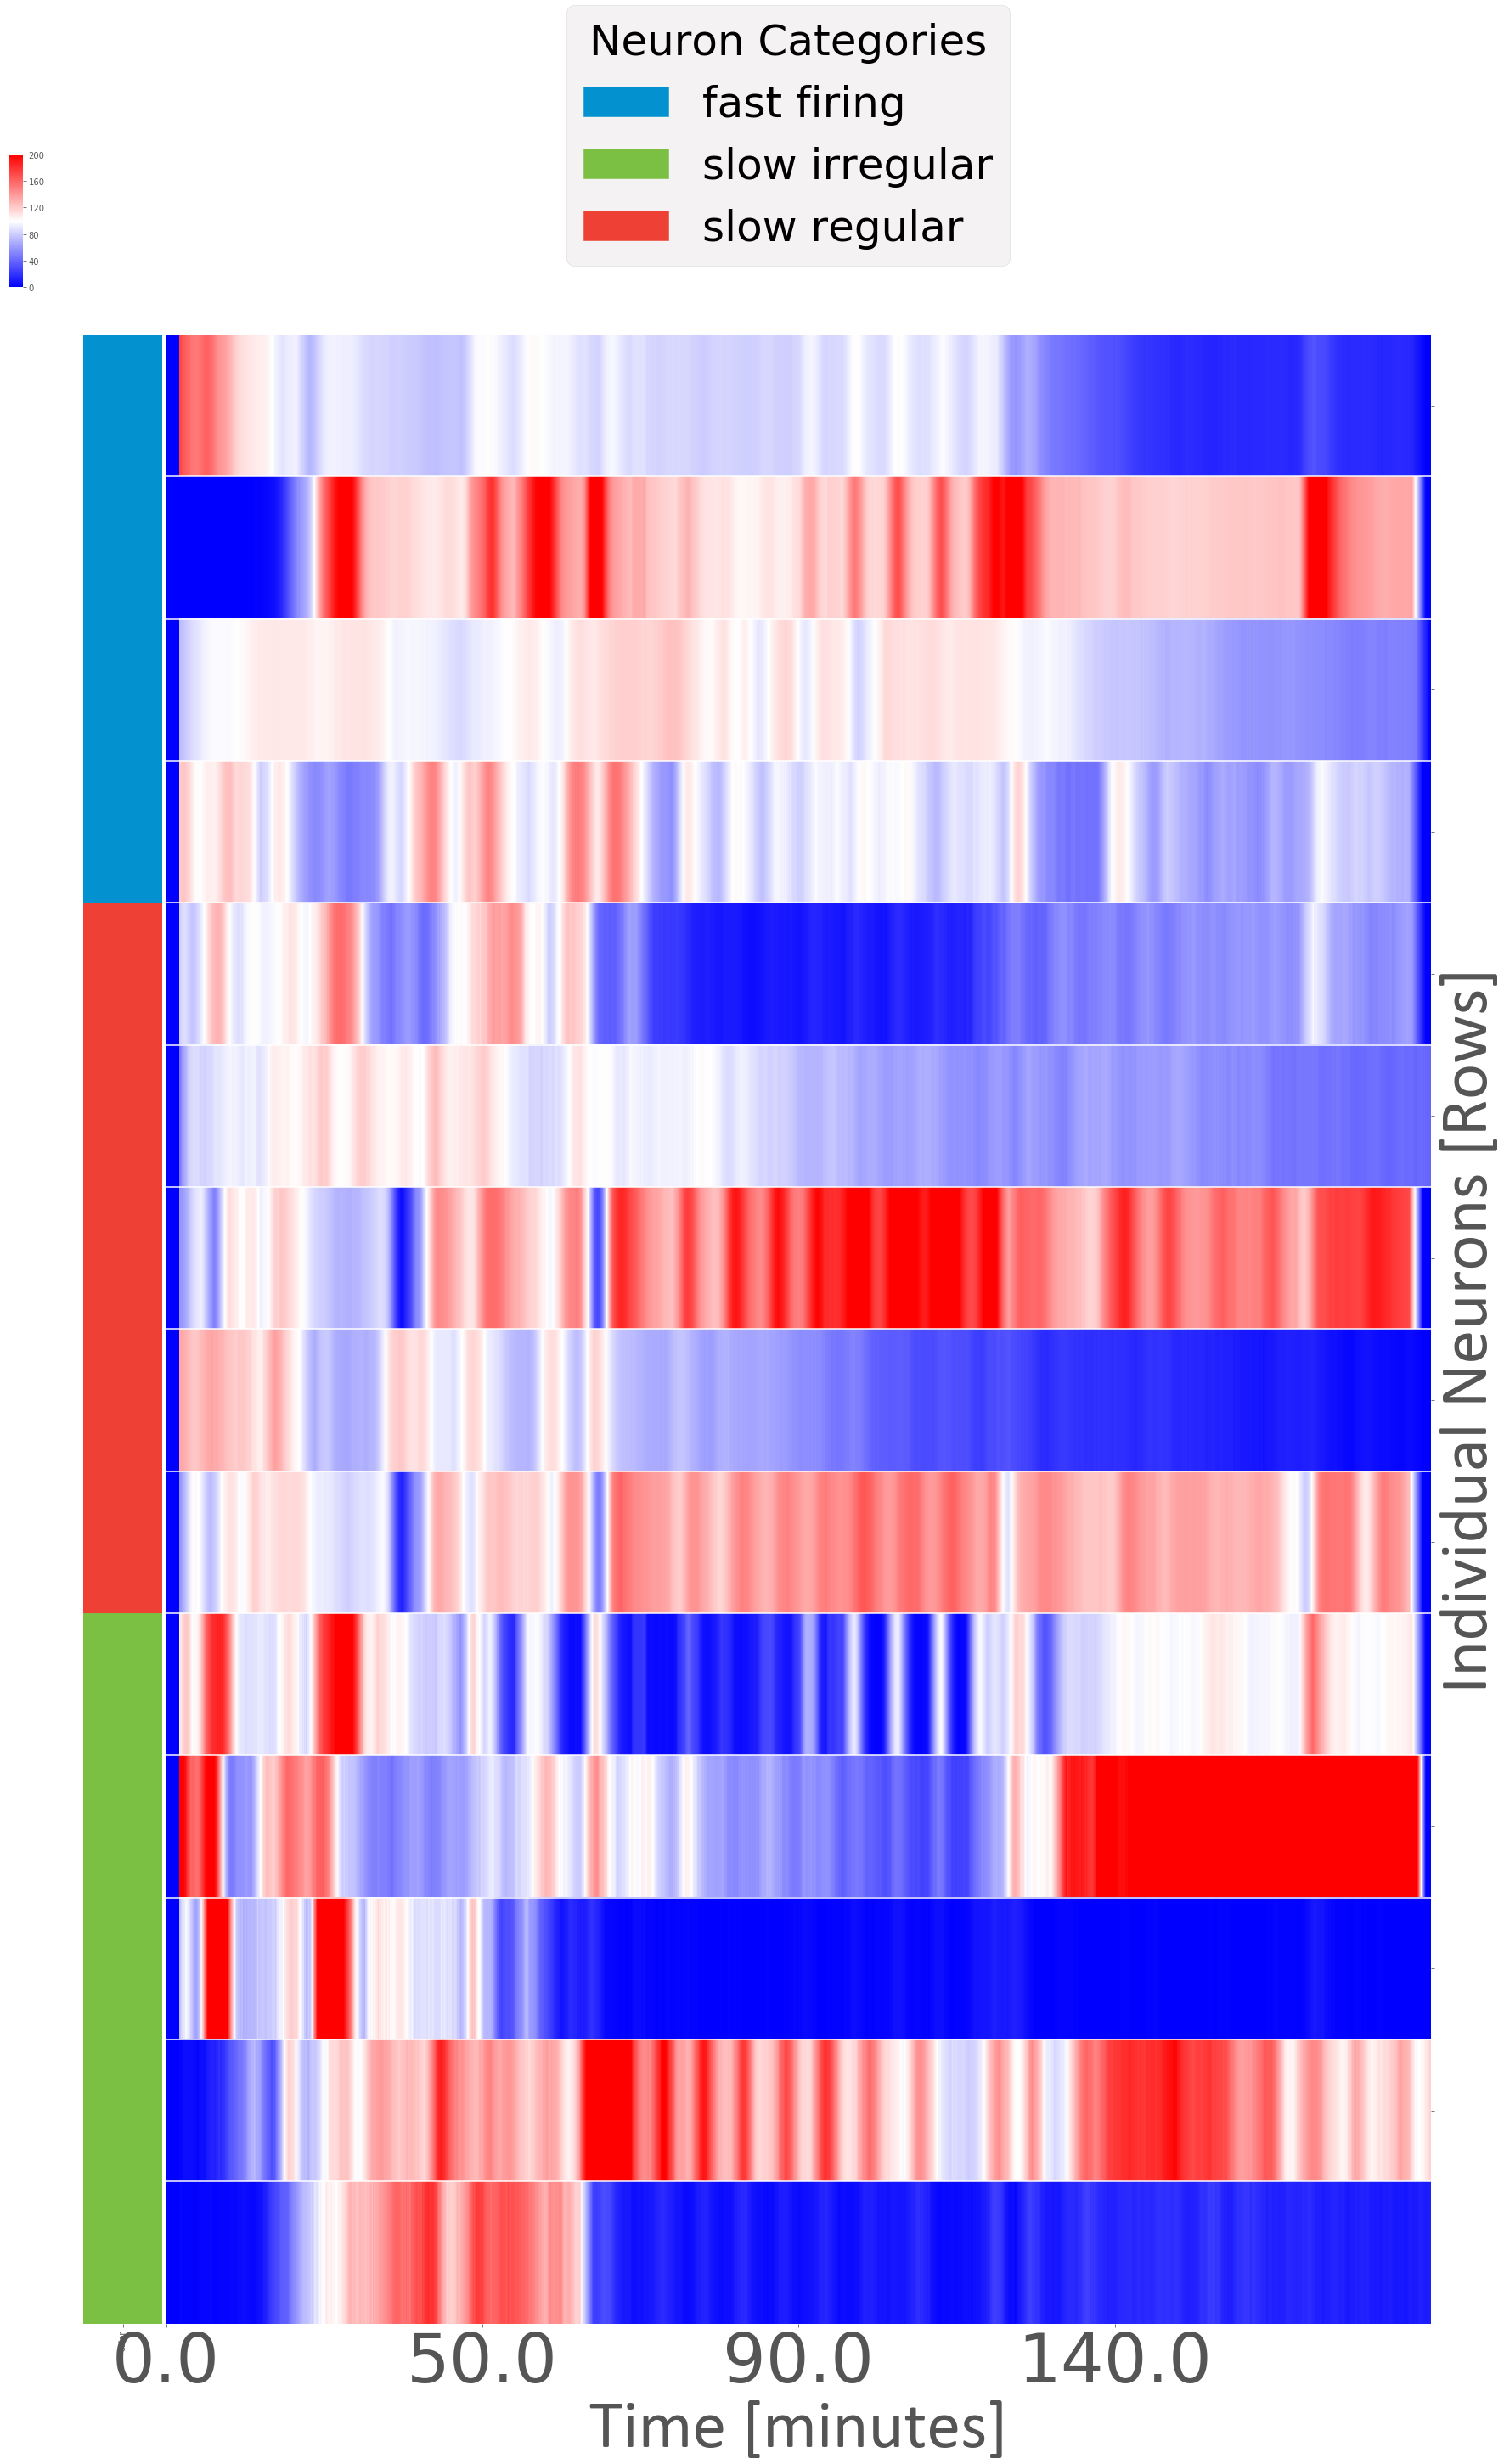

In [59]:
import matplotlib.patches as mpatches

recording_len = df_ts.transpose().index.max().seconds
x_tick_pos = round(recording_len / 4)

cm =sns.clustermap(data=df_ts, cmap='bwr', vmin=vmin, vmax=vmax, row_colors = df_colors.drop('category', axis=1), xticklabels=x_tick_pos, row_cluster= False, col_cluster=False, figsize=(30,47))

patches = []
for color in ['#0392cf', '#7bc043', '#ee4035']:
    patch = mpatches.Patch(color=color, label=df_colors[df_colors['color']==color]['category'].iloc[0])
    patches.append(patch)
    
legends=cm.ax_heatmap.legend(loc='center left',bbox_to_anchor=(0.3, 1.1),handles=patches,frameon=True, markerscale=10, prop={'size': 50})
legends.set_title(title='Neuron Categories',prop={'size':50})

for line in np.arange(0,df_ts.shape[0],1):
    cm.ax_heatmap.axhline(line, color='w')
    
cm.ax_heatmap.set_xticklabels(list(map(lambda num:
                                               str(round(recording_len / 4 / 60 * num, -1)),
                                               [0, 1, 2, 3])), fontsize=80)

#cm.ax_heatmap.set_xticks(pd.to_numeric(ticks), tick_labels)

cm.ax_heatmap.set_xlabel('Time [minutes]', **font, fontsize=80)
cm.ax_heatmap.set_ylabel('Individual Neurons [Rows]', **font, fontsize=80)
cm.ax_heatmap.set_yticklabels([],fontsize=50)
plt.tight_layout
plt.savefig(r'C:\Users\ASUS\Desktop\Images\Heatmap\Chronic_CIT_Heatmap.png', dpi=600)
plt.show()

# Heatmap for saline dataset

In [109]:
df_saline_ts = df_all_data[(df_all_data['recording']=='Chronic_03_2018-07-29')|(df_all_data['recording']=='Chronic_11_2018-08-04')|(df_all_data['recording']=='Chronic_13_2018_08_08')|(df_all_data['recording']=='Chronic_14_2018-08-14')]

In [110]:
df_rec_saline = manipulate_df(df=df_saline_ts)
df_rec_saline['ID_rec'] = df_rec_saline['spike_cluster'].astype(str) + ', ' + df_rec_saline['recording']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [114]:
df_rec_saline[df_rec_saline['recording']=='Chronic_13_2018_08_08']

,spike_cluster,time,condition,recording,category,spike,ID_rec
2751757,12,00:00:00.023067,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"
2751758,12,00:00:00.061200,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"
2751759,12,00:00:00.138100,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"
2751760,12,00:00:00.179100,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"
2751761,12,00:00:00.218900,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"
2751762,12,00:00:00.373433,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"
2751763,12,00:00:00.477500,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"
2751764,12,00:00:00.575600,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"
2751765,12,00:00:00.614500,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"
2751766,12,00:00:00.744233,Baseline,Chronic_13_2018_08_08,fast firing,1,"12, Chronic_13_2018_08_08"


In [115]:
df_rec_saline=df_rec_saline[(df_rec_saline['ID_rec']=='3, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='63, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='12, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='52, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='18, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='73, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='62, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='11, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='64, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='20, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='6, Chronic_03_2018-07-29')|
             (df_rec_saline['ID_rec']=='98, Chronic_13_2018_08_08')|
             (df_rec_saline['ID_rec']=='51, Chronic_13_2018_08_08')|
             (df_rec_saline['ID_rec']=='9, Chronic_13_2018_08_08')|
             (df_rec_saline['ID_rec']=='95, Chronic_13_2018_08_08')|
             (df_rec_saline['ID_rec']=='6, Chronic_11_2018-08-04')|
             (df_rec_saline['ID_rec']=='121, Chronic_11_2018-08-04')|
             (df_rec_saline['ID_rec']=='118, Chronic_11_2018-08-04')]

In [116]:
df_rec_saline['ID_rec'].unique()

array(['12, Chronic_03_2018-07-29', '52, Chronic_03_2018-07-29',
       '63, Chronic_03_2018-07-29', '64, Chronic_03_2018-07-29',
       '11, Chronic_03_2018-07-29', '62, Chronic_03_2018-07-29',
       '73, Chronic_03_2018-07-29', '6, Chronic_03_2018-07-29',
       '20, Chronic_03_2018-07-29', '18, Chronic_03_2018-07-29',
       '3, Chronic_03_2018-07-29', '6, Chronic_11_2018-08-04',
       '121, Chronic_11_2018-08-04', '118, Chronic_11_2018-08-04',
       '98, Chronic_13_2018_08_08', '95, Chronic_13_2018_08_08',
       '9, Chronic_13_2018_08_08', '51, Chronic_13_2018_08_08'],
      dtype=object)

In [117]:
heatmap_index = []
category_reminder = {}
for category in df_rec_saline['category'].unique():
    one_type = df_rec_saline[df_rec_saline['category']==category]['ID_rec'].unique().tolist()
    heatmap_index.extend(one_type)
    category_reminder[category] = one_type

In [118]:
base_means, base_stds, base_sorted = get_baseline_stats(df=df_rec_saline,
                                                                condition_label='Baseline',
                                                                resample_period=resample_period)

df_ts = create_ts(df=df_rec_saline,
                           resample_period=resample_period,
                           rolling_period=rolling_periods)

df_ts = normalise(df=df_ts,
                           method=normalisation_method,
                           condition_means=base_means,
                           condition_stds=base_stds,
                           condition_sorted=base_sorted)

In [119]:
for recording in df_rec_saline['recording'].unique():
    print(recording)
    print(df_rec_saline[df_rec_saline['recording']==recording]['time'].max())
    print('------------------')

Chronic_03_2018-07-29
0 days 02:00:10.328867
------------------
Chronic_11_2018-08-04
0 days 02:11:18.921433
------------------
Chronic_13_2018_08_08
0 days 03:02:46.353833
------------------


In [120]:
max_time = df_rec_saline['time'].max()
maxtime = max_time.total_seconds()/60

In [121]:
category_reminder

{'V.fast firing': ['63, Chronic_03_2018-07-29',
  '3, Chronic_03_2018-07-29',
  '51, Chronic_13_2018_08_08'],
 'fast firing': ['12, Chronic_03_2018-07-29',
  '52, Chronic_03_2018-07-29',
  '73, Chronic_03_2018-07-29',
  '18, Chronic_03_2018-07-29',
  '98, Chronic_13_2018_08_08'],
 'slow irregular': ['64, Chronic_03_2018-07-29',
  '6, Chronic_03_2018-07-29',
  '20, Chronic_03_2018-07-29',
  '118, Chronic_11_2018-08-04',
  '9, Chronic_13_2018_08_08'],
 'slow regular': ['11, Chronic_03_2018-07-29',
  '62, Chronic_03_2018-07-29',
  '6, Chronic_11_2018-08-04',
  '121, Chronic_11_2018-08-04',
  '95, Chronic_13_2018_08_08']}

In [122]:
df_ts = df_ts.fillna(value=0)
df_ts = df_ts.reindex(index=heatmap_index)
catergories_dict = find_category(df_rec_saline)
categories = pd.Series(catergories_dict)
colors = pd.Series(catergories_dict).apply(lambda x: color_list[3] if x == 'slow regular' else color_list[2] if x == 'slow irregular' else color_list[0] if x == 'fast firing' else color_list[1])
df_colors = pd.concat([categories, colors], axis=1)
df_colors.columns = ['category', 'color']

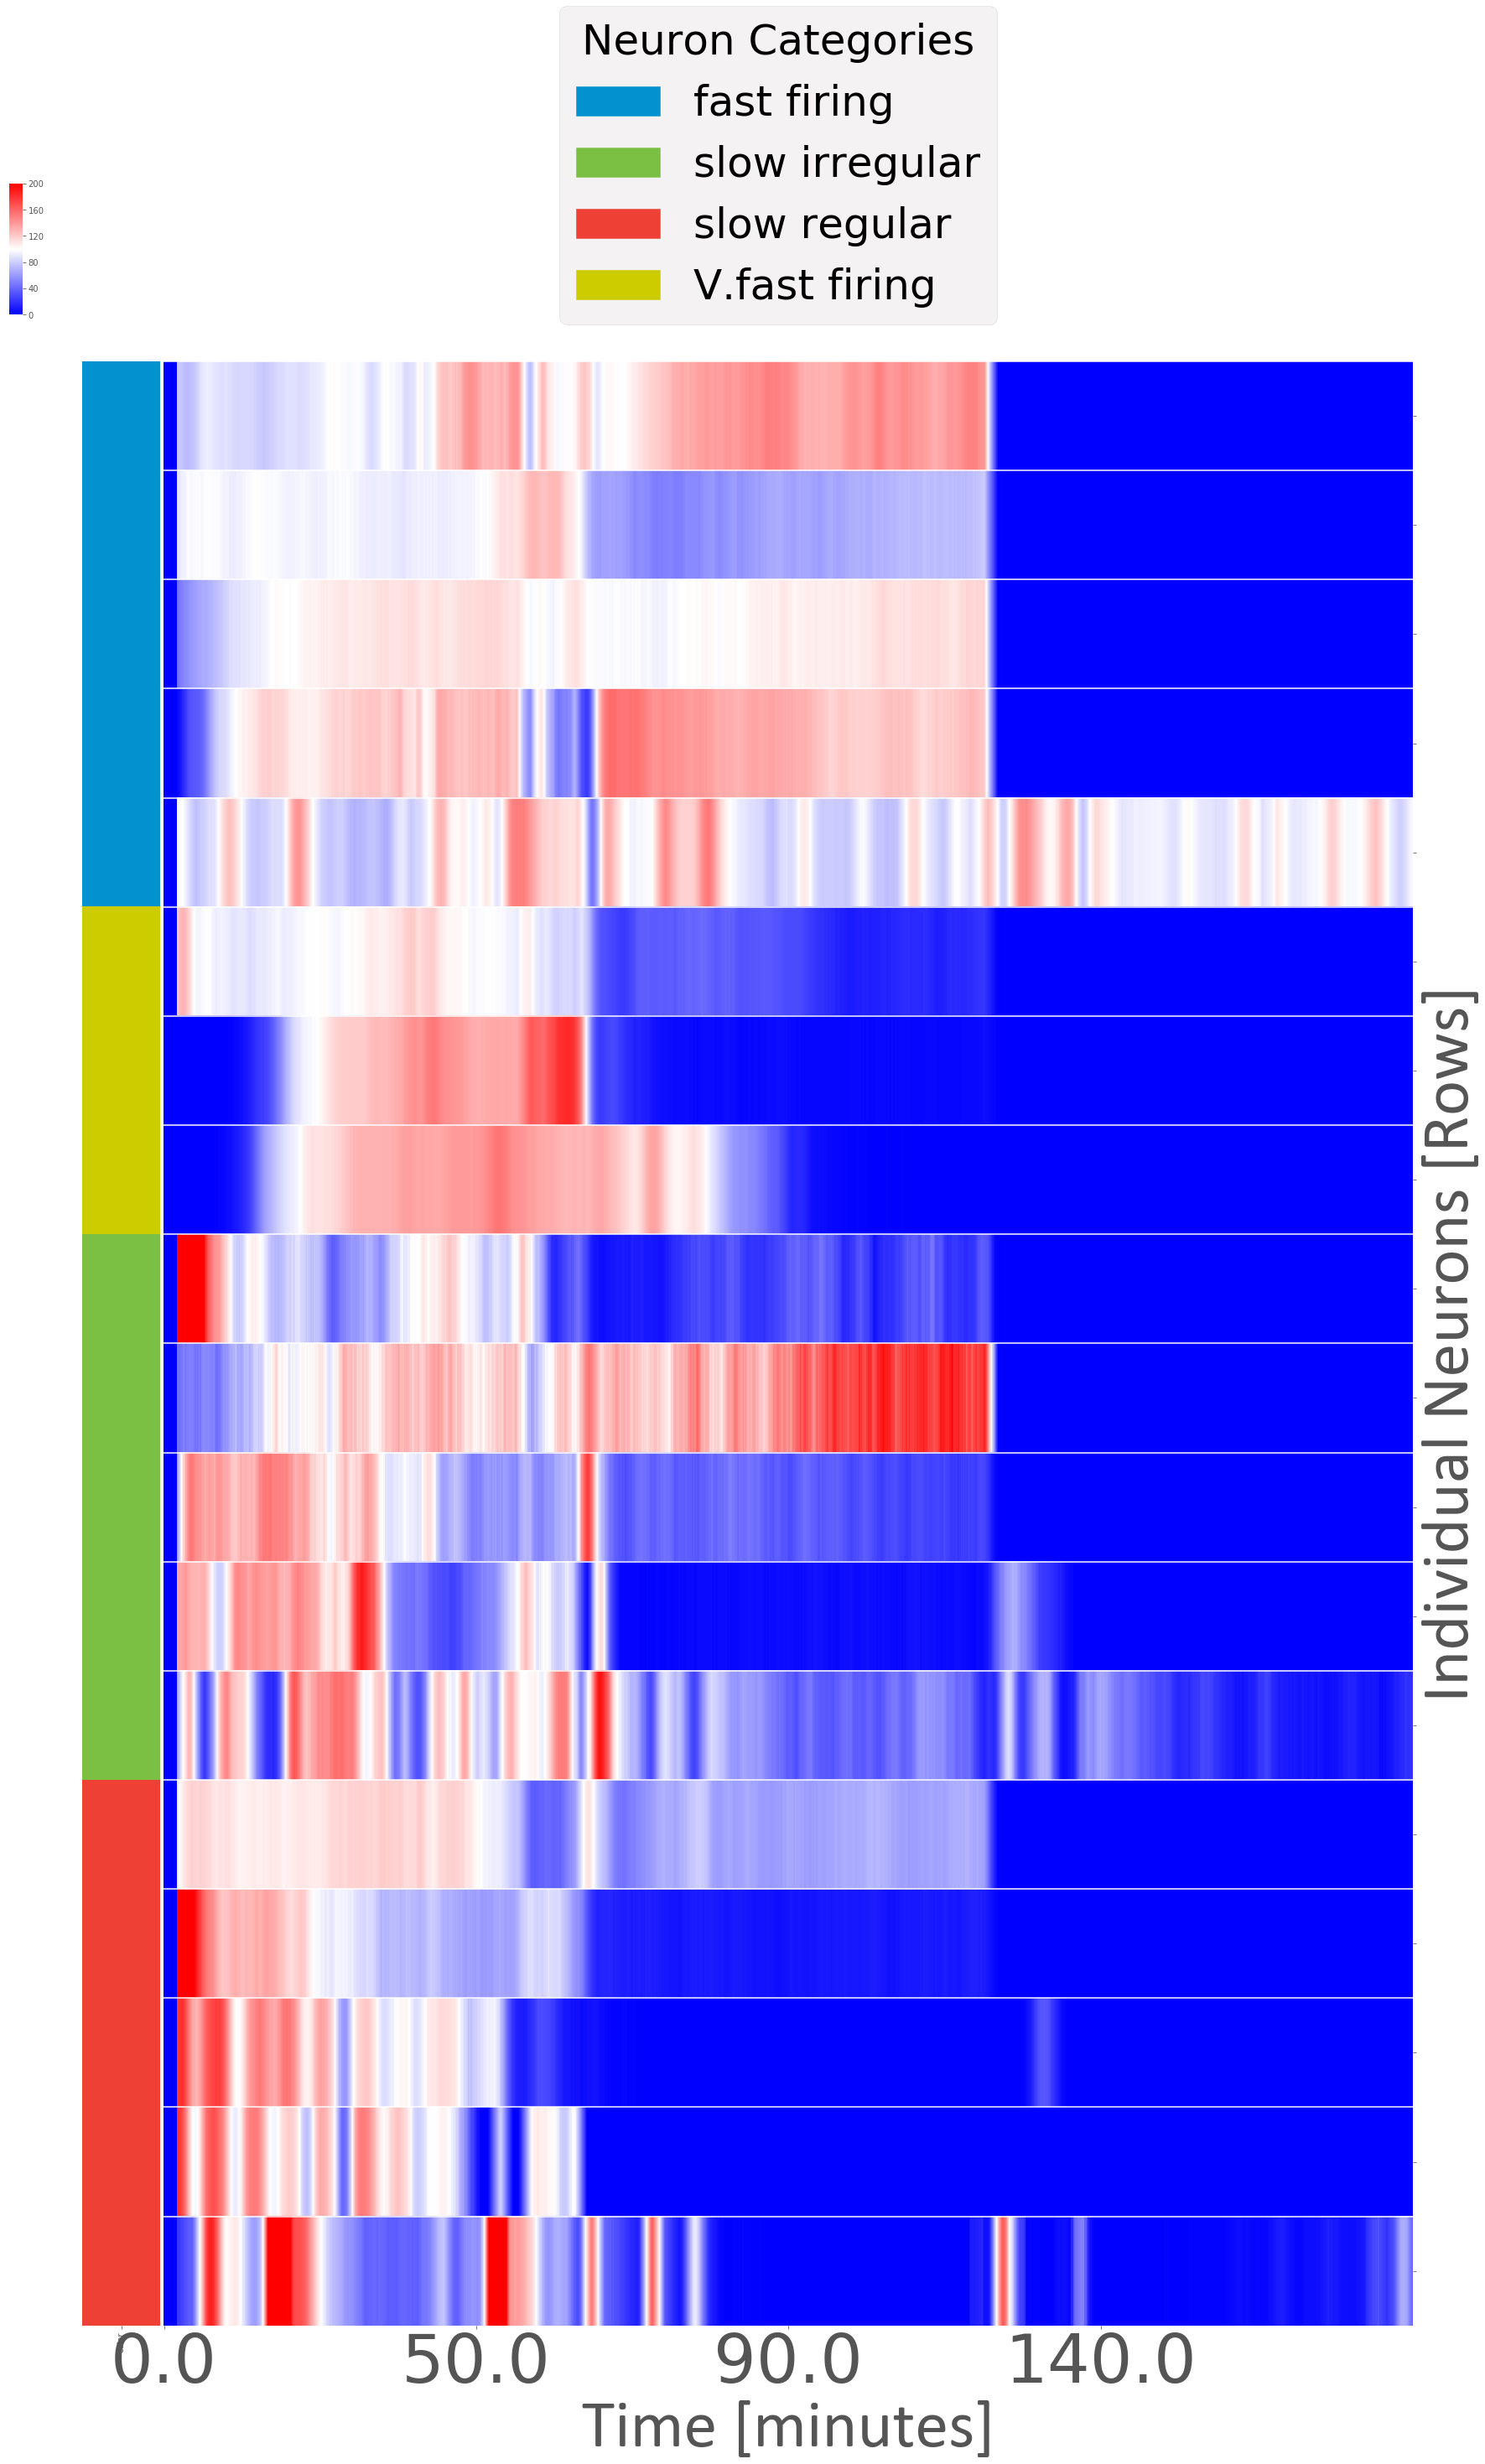

In [126]:
import matplotlib.patches as mpatches

recording_len = df_ts.transpose().index.max().seconds
x_tick_pos = round(recording_len / 4)

cm =sns.clustermap(data=df_ts,cmap='bwr', vmin=vmin, vmax=vmax, row_colors = df_colors.drop('category', axis=1), xticklabels=x_tick_pos, row_cluster= False, col_cluster=False, figsize=(30,47))

patches = []
for color in ['#0392cf', '#7bc043', '#ee4035','#CCCC00']:
    patch = mpatches.Patch(color=color, label=df_colors[df_colors['color']==color]['category'].iloc[0])
    patches.append(patch)
    
legends=cm.ax_heatmap.legend(loc='center left',bbox_to_anchor=(0.3, 1.1),handles=patches,frameon=True, markerscale=10, prop={'size': 50})
legends.set_title(title='Neuron Categories',prop={'size':50})

for line in np.arange(0,df_ts.shape[0],1):
    cm.ax_heatmap.axhline(line, color='w')
    
cm.ax_heatmap.set_xticklabels(list(map(lambda num:
                                               str(round(recording_len / 4 / 60 * num, -1)),
                                               [0, 1, 2, 3])), fontsize=80)

#cm.ax_heatmap.set_xticks(pd.to_numeric(ticks), tick_labels)

cm.ax_heatmap.set_xlabel('Time [minutes]', **font, fontsize=80)
cm.ax_heatmap.set_ylabel('Individual Neurons [Rows]', **font, fontsize=80)
cm.ax_heatmap.set_yticklabels([], fontsize=50)
plt.tight_layout
#plt.savefig(r'C:\Users\ASUS\Desktop\Images\Heatmap\Saline_Heatmap.png', dpi=600)
plt.show()